<a href="https://colab.research.google.com/github/Natali-PP/diplodatos2021/blob/main/Copia_de_Palas_Atenea_AyVdD_Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

### Integrantes
- Bosch, Daniela
- Gherra, Estefanía
- Iberra, Yanina
- Mantovani, Luciano
- Palacio Pastor, Natalí

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

# Set float format
pd.set_option('display.float_format','{:.2f}'.format)

# Set style
seaborn.set_style("darkgrid")
seaborn.set_palette('pastel')
seaborn.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12}) 

## Lectura del dataset

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)


In [75]:
#df[:5]

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

## 1- Selección de columnas relevantes para el análisis 

Para seleccionar las columnas o variables relevantes para responder a la pregunta, comenzamos con un análisis exploratorio univariado, preliminar, observando un resumen de medidas de estadística descriptiva y cantidad de valores perdidos:

In [4]:
df.describe(include= "all")

# pregunta para profes: se puede mostrar el resultado como una tabla con la primera fila y primera columna inmovilizada para facilitar su lectura?

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
count,6095,6095.00,6095,6095,6095.00,6095.00,6095.00,6095.00,6095,6095,5796,5561,6095,6095,6095,6095,6093,6094,6094,6093,6089,6094,6095,6095,6095,6095.00,6095,6095,6095.00,5883.00,676,6095.00,6095.00,6095,6095,6095,6095.00,6095.00,5954,5912,600,2207,6095,6095,6095.00,6095.00,6094,1692
unique,3,nan,1,25,nan,nan,nan,nan,7,3,495,799,7,2,2,334,1183,1637,1371,1271,717,1097,4,4,3,nan,3,5,nan,nan,1,nan,nan,5,192,5,nan,nan,3,42,89,2,10,3,nan,nan,1916,1293
top,Hombre,nan,Argentina,Ciudad Autónoma de Buenos Aires,nan,nan,nan,nan,Universitario,Completado,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",No,Sí,Developer,Ninguna de las anteriores,Ninguno de los anteriores,Ninguno de los anteriores,Ninguna de las anteriores,Ninguna de las anteriores,Ninguno de los anteriores,Windows,Android,No,nan,Porcentaje de mi sueldo,Full-Time,nan,nan,Mi sueldo está dolarizado,nan,nan,No,No recibo bono,No,nan,nan,Jamás,Heterosexual,Visual,No,11-50,Producto basado en Software,nan,nan,Ninguna de las anteriores,Mercado Libre
freq,5122,nan,6095,3764,nan,nan,nan,nan,4133,2907,1194,1378,2650,5211,3268,2402,744,661,1379,871,2173,903,3442,4868,4640,nan,3183,5166,nan,nan,676,nan,nan,3782,3673,2671,nan,nan,4096,4905,319,2064,1065,2200,nan,nan,828,72
mean,NaN,41.18,NaN,NaN,8.93,3.31,2.89,2.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,664.04,NaN,NaN,124058.55,94907.95,NaN,2.62,2.36,NaN,NaN,NaN,10.44,2.79,NaN,NaN,NaN,NaN,NaN,NaN,7.34,7.62,NaN,NaN
std,NaN,665.72,NaN,NaN,7.16,4.37,3.42,32.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10540.52,NaN,NaN,122912.35,96862.26,NaN,0.86,0.95,NaN,NaN,NaN,12.86,2.84,NaN,NaN,NaN,NaN,NaN,NaN,2.02,2.32,NaN,NaN
min,NaN,18.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,1.00,1.00,NaN,1.00,1.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN,NaN
25%,NaN,27.00,NaN,NaN,3.00,0.00,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,61595.00,51480.00,NaN,2.00,2.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.00,NaN,NaN
50%,NaN,31.00,NaN,NaN,7.00,2.00,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,96000.00,78000.00,NaN,3.00,2.00,NaN,NaN,NaN,7.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,8.00,8.00,NaN,NaN
75%,NaN,37.00,NaN,NaN,13.00,4.00,4.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,145000.00,106000.00,NaN,3.00,3.00,NaN,NaN,NaN,18.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,9.00,10.00,NaN,NaN


In [5]:
missing_values_count = df.isnull().sum()
missing_values_count[0:48]

profile_gender                                     0
profile_age                                        0
work_country                                       0
work_province                                      0
profile_years_experience                           0
work_years_in_company                              0
work_years_in_current_position                     0
work_people_in_charge_of                           0
profile_studies_level                              0
profile_studies_level_state                        0
profile_career                                   299
profile_university                               534
profile_specialization_courses                     0
profile_open_source_contributions                  0
profile_programming_as_hobby                       0
work_role                                          0
tools_platform                                     2
tools_programming_languages                        1
tools_frameworks                              

En esta primera aproximación a los datos, se observan para cada variable, en relación al total de casos: los casos perdidos (se mencionará sólo si los hay); la cantidad de categorías de las variables cualitativas, y su moda; y las medidas de posición y de variabilidad de los datos en las variables cuantitativas. Se puntualiza rápidamente lo siguiente:

**Muestra total:** 6095 personas (o respuestas).

* **Género**: amplia mayoría de hombres en la muestra.
* **Edad**: la mitad de la muestra tiene como máximo 31 años. Se observan valores extremos superiores -> limpiar para analizar.
* **País del encuestado**: En Argentina el 100% de la muestra (ojo: no es país para el cual trabaja).
* **Provincia del encuestado**: Más de la mitad en CABA.

* **Experiencia laboral en años**:  la mitad de la muestra tiene como máximo 7 años de experiencia laboral. Se observan valores extremos superiores -> limpiar.
* **Años en la empresa**: la mitad de la muestra tiene como máximo 2 años en la empresa; un 25% de la muestra lleva entre 2 y 4 años en la empresa.
* **Gente a cargo**: Esta variable registra una muy alta dispersión -> analizar en detalle/limpiar si se la quiere seleccionar para trabajar. 

* **Nivel de estudio**: La mayoría (>60%) respondió Universitario, pero habría 7 categorías de rta.
* **Estado del estudio**: Habría tres categorías, donde la moda para toda la muestra es "Completado", con un valor cercano al 50% de los datos.
* **Carrera**: Tiene 299 casos perdidos. Habría 495 carreras "diferentes". Moda: Ing.Sist.Inf. con aprox. 1/5 del total de rtas. no vacías.
* **Universidad**: 534 casos perdidos. Habría 799 universidades "diferentes". Moda: UTN con 1378 casos.
* **Cursos**: Habría 7 categorías de rta. Más de 1/3 de la muestra respondió "Si particular".

* **Contribuciones open source**: Un poco más de 5/6 de la muestra dijo "No".
* **Programa como Hobby**: Un poco más de la 1/2 de la muestra dijo que "Si".

* **Rol**: 334 roles. Un poco más de 1/3 de la muestra son desarrolladores (Moda).

* **Plataformas**: Habría 1183 plataformas distintas. La Moda fue "Ninguna de las anteriores" con 744 rtas. Es decir, hay mucha variabilidad de rtas. y no es buen indicador que la moda sea "ninguna de las anteriores"-> Necesita trabajo de análisis detallado, depuración, agrupación de categorías, etc. Tiene dos casos perdidos.
  * situación similar en variables: **Lenguajes de programación** (1637 categ. y 661=Ninguno), **framework** (1371 categ. y 1379=Ninguna), **data bases** (1271 categ. y 871=Ninguna), **qa testing** (717 categ. y 2173=Ninguna), **IDES** (1097 categ. y 903=Ninguna) -> Variables que necesitan análisis. Los casos perdidos oscilan entre 1 y 6 como máximo.

* **Sistema Operativo Pc**: Habría 4 categorías. Más de la mitad de la muestra respondió Windows.
* **Sistema Operativo Celular**: Habría 4 categorías. Más de 2/3 de la muestra respondió Android.

* **Disponibilidad ante llamado**: Más de 2/3 de la muestra respondió NO.
* **Salario por Disponibilidad** Prácticamente son valores extremos -> Analizar (en dólares?, otras razones? errores?).
* **Tipo de salario por la condición "Disponinilidad"**: Más de la mitad de la muestra respondió como % del sueldo (habría 3 categorías de rta.)

* **Tipo de contrato**: Más de 5/6 de la muestra respondió Full Time. Habría 5 categorías diferentes.

* **Salario Bruto**, Variable con con alta variabilidad y extremos -> Analizar en detalle.
  * **Salario Neto**, similar a Bruto. -> Analizar.

* **Sueldo en dolares**: es categorica. Sólo respondió un 10% aprox. de la muestra (676 casos), aparentemente seleccionando una única categoría = "Mi sueldo está dolarizado".

* **Satisfacción**: Notar -> es categórica ordinal (rta. en números estilo escala).

* **Comparación salaro con último semestre**: rta. en números que parece ser categórica -> investigar la definición de la variable o pregunta realizada en la encuesta en caso de seleccionarla para trabajar. 

* **Tiene bono el salario**: +1/2 NO
* ??    salary_bonus_tied_to 
* **Ajuste por inflacion en 2020**: 5 Categorias. -1/2 NO.
* **% Ajuste infl 2020**: entre 0 y 7% al 25% de la muestra. entre 7% y 18% a otro 25%. valores extremos superiores, limpiar.
* **% Ajuste infl. ultimo mes**: entre 2% y 6% al 25% de la muestra, entre 6% y 8% al otro 25%.
* **Situaciones de violencia**: 3 categorias, 141 perdidos. Mayoría 4000/5000 jamás.
* **Orientacion sexual**: 42 categorias. ---- casos perdidos. Amplia mayoria hetero. 
* **Discapacidad**: --- casos perdidos. 319 de 600 visual.



In [6]:
relevant_columns = [
    'tools_programming_languages', 
    'salary_monthly_NETO', 
    'salary_monthly_BRUTO',
    'tools_work_pc_os',
    'work_contract_type',
    'tools_frameworks',
    'profile_years_experience',
    'salary_satisfaction',
    'company_main_activity',
    'salary_in_usd',
    'work_role',
    'work_years_in_company',
    'profile_gender',
    'profile_age'
]

## 2- Selección de filas relevantes para el análisis

Para esta etapa procedemos a inspeccionar los datos para su posterior filtrado.

### 2.1 Funciones auxiliares

In [7]:
def remove_outlier(df_in, col_name, iqr_factor = 1.5):
  """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3 - q1 # interquartile range
  fence_low  = q1 - iqr_factor*iqr
  fence_high = q3 + iqr_factor*iqr
  df_inliers = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
  df_outliers = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
  return df_inliers, df_outliers

# Retorna un nuevo df con una columna por cada valor posible en 'column', de acuerdo al separador. Y se queda con las columnas cuya frequencia sea mayor a 'freq'
def one_hot_encoding(df, column, separator=',', freq=0):
  df_one_hot = df[column].str.replace(' ', '').str.lower().str.get_dummies(sep=separator)
  for column in df_one_hot.columns:
    if (df_one_hot[column].sum() < 10):
        df_one_hot.drop(column, inplace=True, axis=1)
        df_one_hot.reset_index(drop=True, inplace=True)
  return df_one_hot

### 2.2 Limpieza de datos

#### Eliminación de Outliers

En la variable de salario elegida, eliminamos outliers aplicando el método del Rango Intercuartílico con un coeficiente de 3.5. Para evitar distorsiones debido a valores demasiado bajos, eliminamos también todas aquellas entradas cuyo salario sea menor al salario mínimo (correspondiente al período de Octubre 2019 a Octubre del 2020 la encuesta es de Julio/Agosto 2020, 18675 ARS).

Referencia: https://es.wikipedia.org/wiki/Anexo:Salario_m%C3%ADnimo_en_Argentina

In [8]:
# Verifiquemos el rango de valores de la variable 'salary_monthly_NETO'
df['salary_monthly_NETO'].describe()

count      5883.00
mean      94907.95
std       96862.26
min           1.00
25%       51480.00
50%       78000.00
75%      106000.00
max     2080000.00
Name: salary_monthly_NETO, dtype: float64

In [9]:
# Veamos en qué valores rangos de la variable 'salary_monthly_NETO' se concentra la mayor cantidad de casos.
percentiles = [90, 95, 96, 97, 98, 99]
for k in percentiles:
  percentile_90 = df['salary_monthly_NETO'].quantile(k / 100)
  n_below = len(df[df['salary_monthly_NETO'] < percentile_90])
  n_above = len(df[df['salary_monthly_NETO'] > percentile_90])
  print('Percentil {} de la columna {}: {}'.format(k, 'salary_monthly_NETO', percentile_90))
  print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
  print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))
  print('\n')

Percentil 90 de la columna salary_monthly_NETO: 150000.0
% de datos menor que percentil 90: 0.8592288761279737
% de datos mayor que percentil 90: 0.09532403609515996


Percentil 95 de la columna salary_monthly_NETO: 210000.0
% de datos menor que percentil 95: 0.9153404429860541
% de datos mayor que percentil 95: 0.04823625922887613


Percentil 96 de la columna salary_monthly_NETO: 250719.99999999933
% de datos menor que percentil 96: 0.9264971287940935
% de datos mayor que percentil 96: 0.03872026251025431


Percentil 97 de la columna salary_monthly_NETO: 300000.0
% de datos menor que percentil 97: 0.93552091878589
% de datos mayor que percentil 97: 0.026579163248564398


Percentil 98 de la columna salary_monthly_NETO: 370000.0
% de datos menor que percentil 98: 0.9456931911402789
% de datos mayor que percentil 98: 0.018867924528301886


Percentil 99 de la columna salary_monthly_NETO: 491800.0000000029
% de datos menor que percentil 99: 0.9555373256767843
% de datos mayor que percentil

**Observaciones:**

- Vemos que la variable 'salary_monthly_NETO' toma valores entre 1.00 y 2080000.00. Lo cual nos indica que los valores inferiores tan bajos pueden haber sido ingresados erróneamente, a propósito haber puesto un valor cualquiera como 1, o haber puesto el . como separador de miles (donde 100.000, queriendo haber puesto cien mil, será interpretado como valor 100). Ta,bién valores muy bajos se pueden corresponder a que ingresaron el monto en dólares y no en pesos argentinos. 

- Como no contamos con información para tratar cada uno de éstos casos. Eliminaremos los outliers en ambos extremos del conjunto de datos.

-  Casos extremos de valores muy grandes se pueden corresponder a puestos jerárquicos o personas que cobran sueldos dolarizados. Con el método de visualizar los percentiles, vemos que el 97% de los salarios están por debajo de 300000 pesos argentinos. Y luego los percentiles 98 y 99 pegan un salto a 370000 y 491800 respectivamente. Como decisión en éste punto: consideraremos sueldos que no superen los 300000.

In [10]:
print("Tamaño del dataset antes de remover outliers: %i \n" % len(df))

# Removemos outliers
df_inliers, df_outliers = remove_outlier(df, 'salary_monthly_NETO', 3.5)

print("Cantidad de outliers eliminados: %i \n" % len(df_outliers))

print("Porcentaje de outliers eliminados: {0:0.2f} % \n".format(len(df_outliers)/len(df)*100))

df_inliers['salary_monthly_NETO'].describe()

Tamaño del dataset antes de remover outliers: 6095 

Cantidad de outliers eliminados: 183 

Porcentaje de outliers eliminados: 3.00 % 



count     5700.00
mean     81995.65
std      46605.21
min          1.00
25%      50000.00
50%      75000.00
75%     102000.00
max     290000.00
Name: salary_monthly_NETO, dtype: float64

**Observaciones:**

- De los 6095 registros iniciales, se eliminó el 3% (183 registros), correspondientes a valores extremos en la parte superior. Por lo tanto tenemos ahora 5700 registros en total.
- Vemos que el valor máximo de la variable 'salary_monthly_NETO' pasó de 2080000 a 290000 (con lo cual el rango se mantiene por debajo del quantile 97 que habíamos analizado anteriormente).
- Aún tenemos valores extremos en el rango inferior (el mínimo sigue siendo 1), que eliminaremos en el siguiente punto.

In [11]:
"""
Salario Mínimo en Argentina
referencia: https://es.wikipedia.org/wiki/Anexo:Salario_m%C3%ADnimo_en_Argentina
"""

min_salary_2020 = float(16875) # de Octubre 2019 a Octubre del 2020 (la encuesta es de Julio/Agosto 2020)

# Registros a eliminar
df_outliers_lower_limit = df_inliers.query('salary_monthly_NETO < @min_salary_2020')

# Registros a mantener
df_inliers_lower_limit = df_inliers.query('salary_monthly_NETO >= @min_salary_2020')
df = df_inliers_lower_limit

print("Cantidad de outliers eliminados: %i \n" % len(df_outliers_lower_limit))

print("Porcentaje de outliers eliminados: {0:0.2f} % \n".format(len(df_outliers_lower_limit)/len(df)*100))

df['salary_monthly_NETO'].describe()

Cantidad de outliers eliminados: 240 

Porcentaje de outliers eliminados: 4.40 % 



count     5460.00
mean     85474.63
std      44484.20
min      17000.00
25%      54000.00
50%      78000.00
75%     105000.00
max     290000.00
Name: salary_monthly_NETO, dtype: float64

**Observaciones:**

- De los 5700 registros luego de eliminar outliers en el rango superior, se eliminó en éste paso el 4,40% (240 registros), correspondientes a valores extremos en la parte inferior. Por lo tanto tenemos ahora 5460 registros en total.
- Vemos que el valor máximo de la variable 'salary_monthly_NETO' se mantuvo en 290000 y que el mínimo pasó de 1 a 17000 (para tener casos por encima del salario mínimo).

#### Sueldos dolarizados

Dependiendo en qué moneda expresaron el sueldo (neto o bruto), no será comparable con sueldos ingresados en pesos. 

La variable 'salary_in_usd' tiene tres valores ingresados: 
- nulo (no ingresaron valor en éste campo)
- 'Mi sueldo está dolarizado' 

Y en el sueldo Neto encontramos casos con valores por debajo de 12000, por lo que no podemos discernir si esos valores están expresados en pesos o en dólares(algunos de los casos con valores por debajo de 12000, fueron eliminados como outliers).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


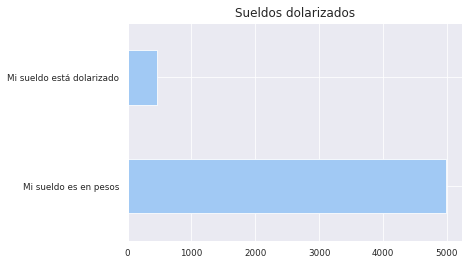

In [12]:
# Creamos una nueva variable categórica para veri si los salarios están dolarizados o no
df['salary_is_usd_cat'] = df.salary_in_usd
df['salary_is_usd_cat'].fillna('Mi sueldo es en pesos', inplace=True)
df['salary_is_usd_cat'].value_counts()
#Plot sueldos dolarizados
df['salary_is_usd_cat'].value_counts().plot.barh(title='Sueldos dolarizados');

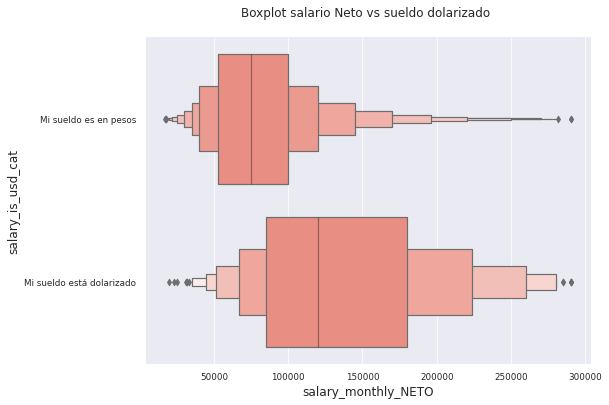

In [13]:
fig = plt.figure(figsize=(8, 6))
g = seaborn.boxenplot(
    data=df, 
    x='salary_monthly_NETO',
    y='salary_is_usd_cat', 
    color='salmon'
)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot salario Neto vs sueldo dolarizado \n')
seaborn.despine()

**Observaciones:**

- Vemos que hay dos sub-poblaciones. Se decide dejar la población completa para el análisis, pero luego se analizarán las diferencias en sueldos y lenguajes según las sub-poblaciones. 

#### Trabajos Full-Time vs No Full-Time

Veamos si los sueldos promedios de quienes no trabajan full time, son menores que los que trabajan full time por medio de graficar diferentes boxplots.

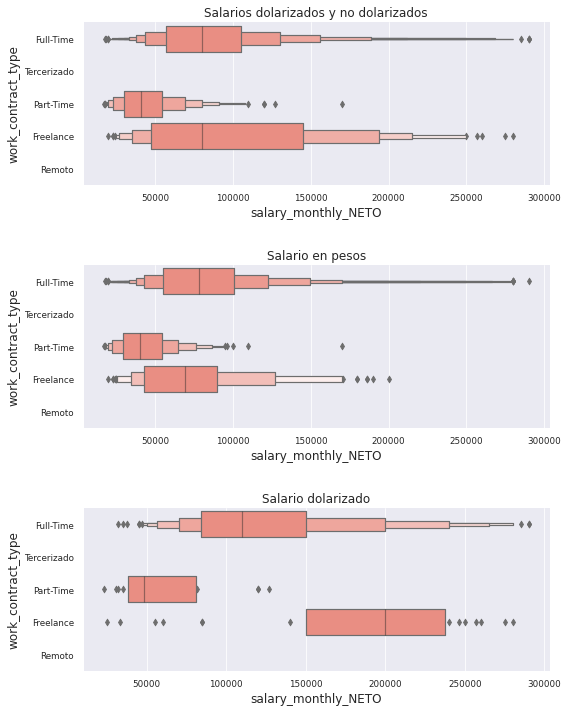

In [14]:
order = ['Full-Time', 'Tercerizado', 'Part-Time', 'Freelance', 'Remoto']
fig, axes = plt.subplots(figsize=(8, 10), nrows=3)

# Boxplot de toda la muestra (salarios dolarizados y no)
seaborn.boxenplot(
    data=df, 
    x='salary_monthly_NETO',
    y='work_contract_type', 
    color='salmon', 
    ax=axes[0],
    order=order
).set_title("Salarios dolarizados y no dolarizados")

# Boxplot de los salarios en pesos
seaborn.boxenplot(
    data=df[df['salary_is_usd_cat'] == 'Mi sueldo es en pesos'], 
    x='salary_monthly_NETO',
    y='work_contract_type', 
    color='salmon', 
    ax=axes[1],
    order=order
).set_title("Salario en pesos")

# Boxplot de los salarios en dólares
seaborn.boxenplot(
    data=df[df['salary_is_usd_cat'] == 'Mi sueldo está dolarizado'], 
    x='salary_monthly_NETO',
    y='work_contract_type', 
    color='salmon',
    ax=axes[2],
    order=order
).set_title("Salario dolarizado")

#plt.xlabel("Salario mensual NETO ($)")
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()
fig.tight_layout(h_pad=3)

In [15]:
# Personas por modalidad de trabajo
display(df.work_contract_type.value_counts())
print("Cantidad de valores nulos: ", len(df[df['work_contract_type'].isnull()])) # No hay valores nulos.

Full-Time                                                 4787
Part-Time                                                  273
Tercerizado (trabajo a través de consultora o agencia)     193
Freelance                                                  131
Remoto (empresa de otro país)                               76
Name: work_contract_type, dtype: int64

Cantidad de valores nulos:  0


In [16]:
# % de personas por modalidad de trabajo
full_time = df.work_contract_type.isin(['Full-Time'])
print("% de personas que tienen modalidad Full-Time: ", len(df[full_time])/len(df)*100)
no_full_time = df.work_contract_type.isin(['Part-Time', 'Tercerizado (trabajo a través de consultora o agencia)', 'Freelance', 'Remoto (empresa de otro país)'])
print("% de personas que tienen modalidad diferentes a Full-Time: ", len(df[no_full_time])/len(df)*100)

% de personas que tienen modalidad Full-Time:  87.67399267399267
% de personas que tienen modalidad diferentes a Full-Time:  12.326007326007327


In [17]:
# Comparamos los salarios en base a la mediana
no_full_time_median = df[no_full_time].salary_monthly_NETO.median()
full_time_median = df[df.work_contract_type.isin(['Full-Time'])].salary_monthly_NETO.median()
print("Mediana de los salarios Full-Time: ", full_time_median)
print("Mediana de los salarios no Full-Time: ", no_full_time_median)

Mediana de los salarios Full-Time:  80000.0
Mediana de los salarios no Full-Time:  57000.0


**Observaciones:**

- Si bien se presentan valores de mediana y distribuciones que difieren en los diferentes grupos de acuerdo al contract type y si el sueldo es dolarizado o no. Se decide continuar con el análisis de toda la muestra, y dejar para un posterior análisis éstos grupos diferenciados.

**Enfocaremos el análisis en una sub-población:**

- Personas con un salario Neto mayor que al salario mínimo (i.e > 16875 pesos) y menor al quantile 97 (290000 pesos).


#### Manejo de valores nulos en la variable 'tools_programming_languages'

In [18]:
print("Cantidad de valores nulos en la variable tools_programming_languages: %i \n" % len(df[df['tools_programming_languages'].isnull()])) 
# Reemplazaremos los valores null por 'Ninguno'
df.tools_programming_languages.replace(numpy.NaN, 'Ninguno', inplace=True)
print("Cantidad de valores nulos en la variable tools_programming_languages luego del reemplazo: %i \n" % len(df[df['tools_programming_languages'].isnull()]))

Cantidad de valores nulos en la variable tools_programming_languages: 1 

Cantidad de valores nulos en la variable tools_programming_languages luego del reemplazo: 0 



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## 3- Análisis de métricas

- Compararemos las distribuciones de salario para cada lenguaje utilizando visualizaciones. 
- Comparararemos medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje.

#### 3.1 Análisis de la variable lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.

In [19]:
df.tools_programming_languages.value_counts() # Hay más de mil valores diferentes ingresados en el campo 'tools_programming_languages'.

Ninguno de los anteriores                                               597
Ninguno                                                                 301
Python                                                                  151
SQL                                                                     149
Java                                                                    142
                                                                       ... 
HTML, Java, Javascript, PHP, SQL, TypeScript                              1
Bash/Shell, Java, Javascript, Objective-C, Ruby, Swift                    1
C, C++, HTML, Java, Javascript, PHP, Python, SQL, SOAP, Biztalk, VB6      1
CSS, Dart, HTML, Java, Javascript, Kotlin                                 1
.NET, C#, Go, Java, Kotlin                                                1
Name: tools_programming_languages, Length: 1498, dtype: int64

**Observaciones**

- Debido a que los usuarios ingresaron como lenguaje uno o más valores, separados por coma y de texto libre, debemos buscar la forma de normalizar éstos valores de lebguajes, para quedarnos con una lista de lenguajes identificados como válidos.

#### 3.2 Convertimos cada lenguaje a variables categóricas (One hot encoding)

Con ésta técnica tendremos el mismo dataframe con nuevas columnas (una por cada lenguaje identificado, o los N más frecuentes) donde asignaremos valores binarios.
Entonces alguien que utiliza sólo Python va a tener un verdadero (equivalente a un 1) en esa columna y un falso en Java (0), SQL (0), etc. De esta manera iremos construyendo una matriz.

In [20]:
# Convertimos cada lenguaje en una columna con 0 o 1 y nos quedamos con las columnas cuya frecuencia sea mayor a 10
print("Tamaño del dataset: %i \n" % len(df))
df_one_hot = one_hot_encoding(df, 'tools_programming_languages', separator=',', freq= 10)
print("Tamaño del nuevo dataframe df_one_hot: ", df_one_hot.shape)
df_one_hot.head(3)
# Quedaron unas 35 columnas, i.e., 35 lenguajes.

Tamaño del dataset: 5460 

Tamaño del nuevo dataframe df_one_hot:  (5460, 37)


,.net,abap,actionscript,apex,assembler,bash/shell,c,c#,c++,cobol,css,dart,delphi,go,groovy,html,java,javascript,kotlin,matlab,ninguno,ningunodelosanteriores,objective-c,perl,php,pl/sql,powershell,python,r,ruby,rust,scala,smalltalk,sql,swift,typescript,vba
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Eliminamos las columnas 'ninguno' y 'ningunodelosanteriores'
df_one_hot.drop(columns=['ninguno','ningunodelosanteriores'], axis=1, inplace=True)
df_one_hot.reset_index(drop=True, inplace=True)
# Concatenamos ambos dataframes (el df y el df_one_encoding) para agregar las columnas de cada lenguaje
df = pd.concat([df, df_one_hot], axis=1) #48+33=81 columnas
print("Tamaño del dataframe agregando una columna por cada lenguaje: ", df.shape)
df.head(3)
# Tenemos ahora 33 valores de "lenguales de programación", los que tenían frecuencia mayor a 10.

Tamaño del dataframe agregando una columna por cada lenguaje:  (6013, 84)


,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,...,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,salary_is_usd_cat,.net,abap,actionscript,apex,assembler,bash/shell,c,c#,c++,cobol,css,dart,delphi,go,groovy,html,java,javascript,kotlin,matlab,objective-c,perl,php,pl/sql,powershell,python,r,ruby,rust,scala,smalltalk,sql,swift,typescript,vba
0,Mujer,26.00,Argentina,Ciudad Autónoma de Buenos Aires,3.00,3.00,3.00,0.00,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.00,Bruto,Full-Time,53000.00,43000.00,NaN,1.00,1.00,No,No recibo bono,No,0.00,0.00,En mi trabajo actual,Homosexual,...,7.00,2.00,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN,Mi sueldo es en pesos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Hombre,29.00,Argentina,Corrientes,5.00,2.00,2.00,4.00,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.00,Bruto,Full-Time,79000.00,63000.00,NaN,2.00,2.00,Menos de un sueldo,Performance de la compañía,Uno,10.00,1.00,Jamás,Heterosexual,...,8.00,9.00,"Horarios flexibles, Stock options / RSUs, Viát...",NaN,Mi sueldo es en pesos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Mujer,22.00,Argentina,Ciudad Autónoma de Buenos Aires,2.00,0.00,0.00,0.00,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.00,Porcentaje de mi sueldo,Full-Time,160000.00,127000.00,NaN,3.00,3.00,Un sueldo,Performance individual,No,0.00,0.00,En un trabajo anterior,Bisexual o queer,...,6.00,9.00,"Clases de gimnasia online, Comidas pagas / sub...",NaN,Mi sueldo es en pesos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### 3.3 Frecuencia de cada lenguaje

In [22]:
# Frecuencia de cada lenguaje, teniendo en cuenta que cada persona puede trabajar en uno o más lenguajes.
lang_columns = df_one_hot.columns
lang_freq = df[lang_columns].sum().sort_values(ascending=False).reset_index()
lang_freq = lang_freq.rename(columns={'index': 'Language', 0: 'Freq'})
lang_freq

,Language,Freq
0,javascript,2209.00
1,sql,1950.00
2,html,1647.00
3,java,1326.00
4,python,1315.00
5,css,1101.00
6,bash/shell,903.00
7,php,790.00
8,.net,737.00
9,typescript,680.00


Text(0.5, 1.0, 'Frecuencia de cada Lenguaje \n')

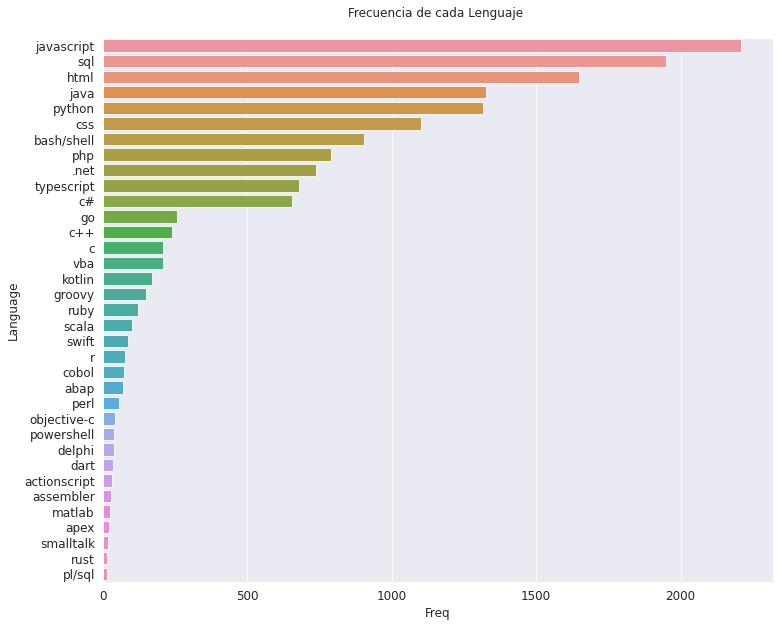

In [23]:
# Plot Frecuencia de cada Lenguaje
plt.figure(figsize=(12, 10))
seaborn.barplot(x='Freq', y='Language', data=lang_freq)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Frecuencia de cada Lenguaje \n')

In [24]:
# Total de ocurrencias de lenguajes
lang_freq['Freq'].sum()

15409.0

In [25]:
# Cantidad de ocurrencias de los primeros 6 lenguajes más frecuentes (6 de 33 = 18,18%)
lang_freq['Freq'][:6].sum()/lang_freq['Freq'].sum()*100

61.96378739697579

**Observaciones:**

-  Los primeros 6 lenguajes más frecuentes, concentran más del 60% de las ocurrencias.
-  Como analizaremos más adelante, los lenguajes más frecuentes no son necesariamente los que tienen mejor salario (esto es, que cobren por encima de la media de los salarios).

#### 3.4 Lenguajes de los mejores y peores salarios

Veamos los lenguajes de "los mejores salarios" (i.e: aquellos que superan la media, éste orden no necesariamente refleja que estén en orden de mejor pagos).

In [26]:
# Lenguajes más frequentes entre los que ganan más o igual que el salario neto promedio
avg_salary = df['salary_monthly_NETO'].mean()
print("Salario Neto promedio: %i \n" % avg_salary)
is_above_avg = df['salary_monthly_NETO'] >= avg_salary
lang_freq2= df[is_above_avg][lang_columns].sum().sort_values(ascending=False).reset_index()
lang_freq2 = lang_freq2.rename(columns={'index': 'Language', 0: 'Freq'})
lang_freq2.head(10)

Salario Neto promedio: 85474 



,Language,Freq
0,javascript,831.00
1,sql,714.00
2,html,622.00
3,python,497.00
4,java,471.00
5,css,413.00
6,bash/shell,338.00
7,php,307.00
8,.net,261.00
9,typescript,238.00


In [27]:
# Lenguajes más frequentes entre los que ganan menos del salario neto promedio
is_above_avg2 = df['salary_monthly_NETO'] < avg_salary
lang_freq3= df[is_above_avg2][lang_columns].sum().sort_values(ascending=False).reset_index()
lang_freq3 = lang_freq3.rename(columns={'index': 'Language', 0: 'Freq'})
lang_freq3.head(10)

,Language,Freq
0,javascript,1135.00
1,sql,1034.00
2,html,852.00
3,java,698.00
4,python,681.00
5,css,577.00
6,bash/shell,465.00
7,.net,399.00
8,php,398.00
9,typescript,373.00


**Observaciones:**

- Se puede ver que los lenguajes más frecuentes, casi no varían entre los que cobran mayor o menor al salario medio. Por lo tanto no existe una relación entre "trabajar con  los lenguajes más frecuentes" y "cobrar más".

- Entre los lenguajes más frecuentes tenemos casos de personas que cobran tanto por encima como por debajo de la media.



#### 3.5 ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

In [28]:
# Lenguajes vs. salarios medios
# Una persona puede trabajar con más de un lenguaje
salary_mean_by_lang = {}
for lang in lang_columns:
  mean_salary = df[df[lang]==1]['salary_monthly_NETO'].mean()
  freq = len(df[df[lang]==1])
  salary_mean_by_lang.update({lang: [mean_salary, freq]})
df2 = pd.DataFrame(list(salary_mean_by_lang.items()), columns=['Languajes','Mean_Salary_and_Freq'])
df2[['Mean_Salary','Freq']] = pd.DataFrame(df2.Mean_Salary_and_Freq.tolist(), index= df2.index)
df2.drop('Mean_Salary_and_Freq', axis=1, inplace=True)
df2 = df2.sort_values(by=['Mean_Salary'], ascending=False, ignore_index=True)
df2.head(10)

,Languajes,Mean_Salary,Freq
0,objective-c,99231.84,42
1,smalltalk,95083.06,16
2,perl,89520.64,54
3,ruby,89193.21,120
4,assembler,89001.64,27
5,rust,88840.00,14
6,groovy,88214.76,147
7,scala,87034.26,99
8,php,86346.12,790
9,go,85674.05,256


Text(0.5, 1.0, 'Salarios neto promedio por lenguaje de programación \n')

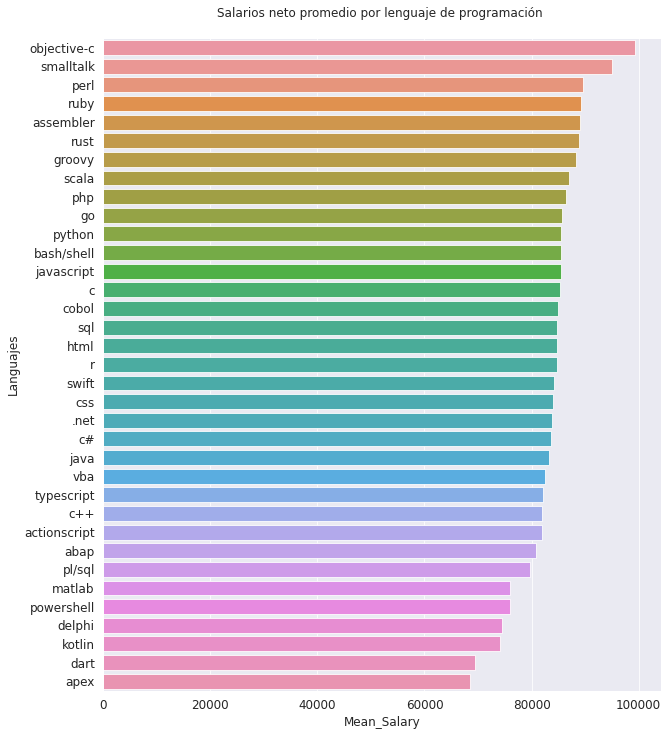

In [29]:
# Plot de Salarios neto promedio por lenguaje de programación
plt.figure(figsize=(10, 12))
seaborn.barplot(x="Mean_Salary", y="Languajes", data=df2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Salarios neto promedio por lenguaje de programación \n')

**Observaciones:**

- Volviendo a la pregunta inicial del ejercicio 1: "¿Cuáles son los lenguajes de programación asociados a los mejores salarios?", podemos ver entre los lenguajes mejores pagos (ésto es cuyo salario medio es mayor al salario medio de otro lenguaje):
  - Smaltak
  - etc
  - etc

#### 3.6 Análisis del impacto de las variables 'company_main_activity'

In [30]:
df['company_main_activity'].value_counts()

Servicios / Consultoría de Software / Digital    1925
Producto basado en Software                      1909
Otras industrias                                 1626
Name: company_main_activity, dtype: int64

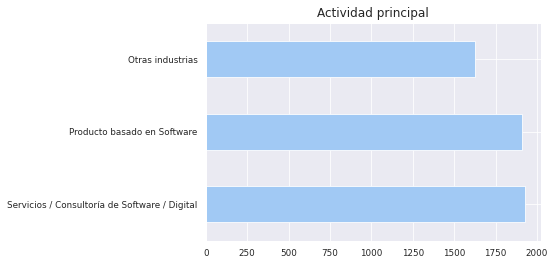

In [31]:
df['company_main_activity'].value_counts().plot.barh(title='Actividad principal');

**Observaciones:**

- Al tener sólo tres categorías, se descarta la variable 'company_main_activity' para su análisis. Se visualiza también que la muestra está distribuída de manera proporcional en esas tres categorías.

#### 3.7 Análisis del impacto de las variables 'profile_years_experience'

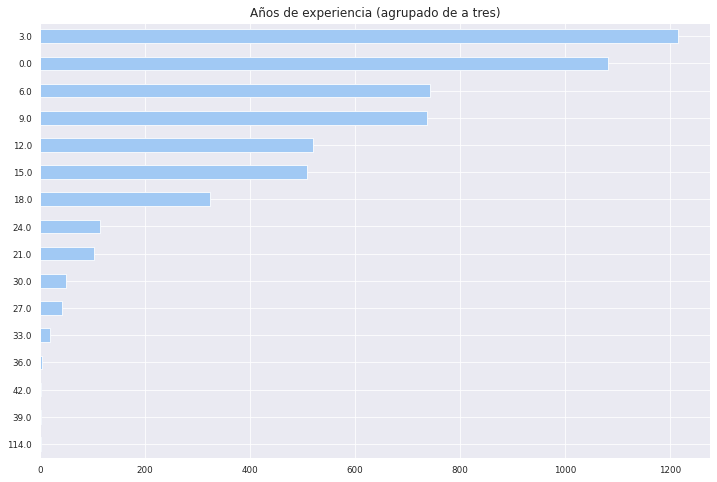

In [32]:
# Veamos la cantidad de años de trabajo que tiene la gente agrupadas cada tres años para mejorar la visualización.
df['profile_years_experience'].\
                            apply(lambda x: 3 * (x // 3)).\
                            value_counts(sort=True, ascending=True).\
                            tail(20).plot.barh(title='Años de experiencia (agrupado de a tres)', figsize=(12,8));

**Observaciones:**

- La mayoría de los encuestados se concentra en los rangos de experiencia entre 0-3 y 3-6 años de experiencia.
- Pero si se contabiliza el total de encuestados que tienen más de 6 años de experiencia como un sólo grupo, éste pasa a ser mayoritario.

In [33]:
# Años de experiencia (media) vs lenguajes de programación
salary_mean_by_lang = {}
for lang in lang_columns:
  mean_years_experience = df[df[lang]==1]['profile_years_experience'].mean()
  freq = len(df[df[lang]==1])
  #freq = df[lang].sum()
  salary_mean_by_lang.update({lang: [mean_years_experience, freq]})
df3 = pd.DataFrame(list(salary_mean_by_lang.items()), columns=['Languajes','Mean_Years_Experience_and_Freq'])
df3[['Mean_Years_Experience','Freq']] = pd.DataFrame(df3.Mean_Years_Experience_and_Freq.tolist(), index= df3.index)
df3.drop('Mean_Years_Experience_and_Freq', axis=1, inplace=True)
df3 = df3.sort_values(by=['Mean_Years_Experience'], ascending=False, ignore_index=True)
df3.head(10)

,Languajes,Mean_Years_Experience,Freq
0,r,10.85,75
1,cobol,10.09,74
2,ruby,10.03,120
3,powershell,10.00,36
4,apex,9.95,19
5,delphi,9.49,36
6,pl/sql,9.33,14
7,objective-c,9.22,42
8,actionscript,9.20,31
9,smalltalk,9.19,16


Text(0.5, 1.0, 'Años de esperiencia promedio por lenguaje de programación \n')

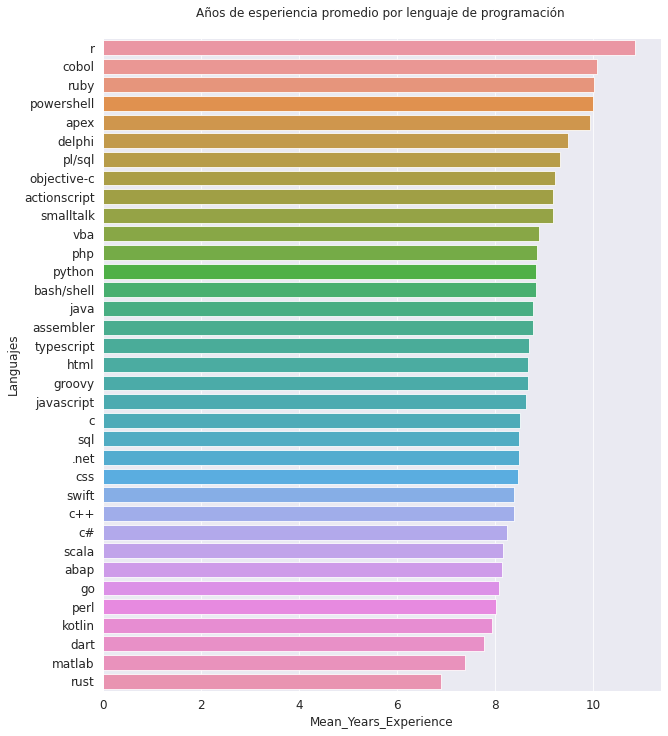

In [34]:
# Plot años de experiencia (media) vs lenguajes de programación
plt.figure(figsize=(10, 12))
seaborn.barplot(x="Mean_Years_Experience", y="Languajes", data=df3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Años de esperiencia promedio por lenguaje de programación \n')

**Observaciones:**

- Los lenguajes con mayor promedio de años de experiencia son:
  - r
  - cobol
  - ruby
  - powershell
  - apex
  - delphi

#### 3.8 **Veamos cómo varía éste análisis si sólo no quedamos con la siguiente sub-población de salarios en pesos:**

- Personas con un salario Neto mayor que la mitad del salario mínimo a la fecha de la encuesta (i.e > $16875),
- Personas cuyo salario no está dolarizado.

In [35]:
print("Tamaño del dataset antes de remover los salarios dolarizados: %i \n" % len(df))
df = df[df['salary_in_usd'].isna()]
print("Tamaño del dataset después de remover los salarios dolarizados: %i \n" % len(df))
df.reset_index(drop=True, inplace=True)

Tamaño del dataset antes de remover los salarios dolarizados: 6013 

Tamaño del dataset después de remover los salarios dolarizados: 5546 



##### ¿Cuáles son los lenguajes de programación asociados a los mejores salarios (no dolarizados)?

Text(0.5, 1.0, 'Salarios neto en pesos promedio por lenguaje de programación \n')

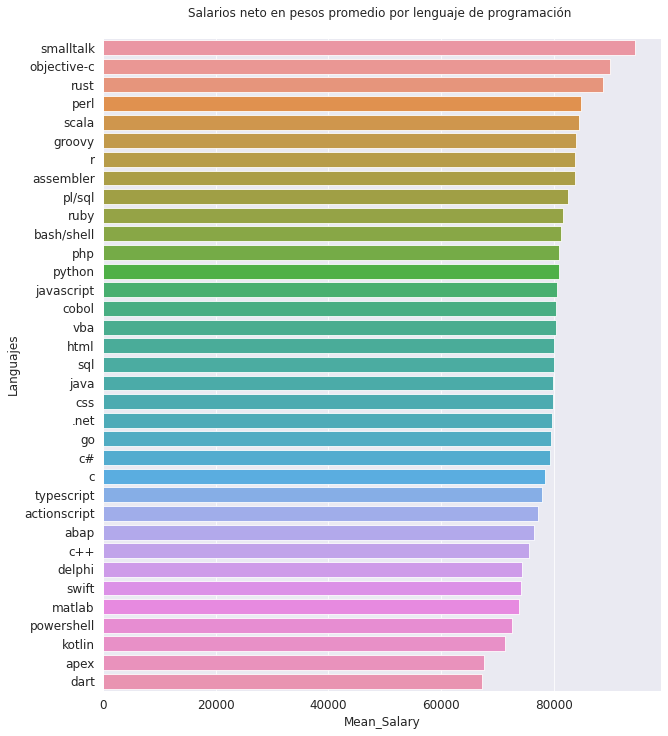

In [36]:
# Lenguajes vs. salarios medios
# Una persona puede trabajar con más de un lenguaje
salary_mean_by_lang = {}
for lang in lang_columns:
  mean_salary = df[df[lang]==1]['salary_monthly_NETO'].mean()
  freq = len(df[df[lang]==1])
  salary_mean_by_lang.update({lang: [mean_salary, freq]})
df4 = pd.DataFrame(list(salary_mean_by_lang.items()), columns=['Languajes','Mean_Salary_and_Freq'])
df4[['Mean_Salary','Freq']] = pd.DataFrame(df4.Mean_Salary_and_Freq.tolist(), index= df4.index)
df4.drop('Mean_Salary_and_Freq', axis=1, inplace=True)
df4 = df4.sort_values(by=['Mean_Salary'], ascending=False, ignore_index=True)
# Plot de Salarios neto promedio por lenguaje de programación
plt.figure(figsize=(10, 12))
seaborn.barplot(x="Mean_Salary", y="Languajes", data=df4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Salarios neto en pesos promedio por lenguaje de programación \n')

**Observaciones:**

- El rango de salarios pasó a 0-80000 pesos, mientras que en el caso en que también se contabilizaban los sueldos dolarizados el rango iba de 0-100000 pesos.

- Volviendo a la pregunta inicial del ejercicio 1: "¿Cuáles son los lenguajes de programación asociados a los mejores salarios?", podemos ver que el orden de los lenguajes mejores pagos tuvo una leve variación ('rust' y 'scala' subieron a los primeros 5 lugares y 'ruby' y 'assembler' salieron del top five.

#### 3.9 **Veamos cómo varía éste análisis si sólo no quedamos con la siguiente sub-población de salarios en pesos y trabajo full-time:**

- Personas con un salario Neto mayor que la mitad del salario mínimo a la fecha de la encuesta (i.e > $16875),
- Personas cuyo salario no está dolarizado.
- Personas cuyo trabajo es Full-Time.

In [37]:
full_time = df.work_contract_type.isin(['Full-Time'])
print("Tamaño del dataset antes de quedarnos sólo con los Full-Time: %i \n" % len(df))
df = df[full_time]
print("Tamaño del dataset después de quedarnos sólo con los Full-Time: %i \n" % len(df))
df.reset_index(drop=True, inplace=True)

Tamaño del dataset antes de quedarnos sólo con los Full-Time: 5546 

Tamaño del dataset después de quedarnos sólo con los Full-Time: 4438 



##### ¿Cuáles son los lenguajes de programación asociados a los mejores salarios (no dolarizados y full-time)?

Text(0.5, 1.0, 'Salarios neto en pesos promedio por lenguaje de programación \n')

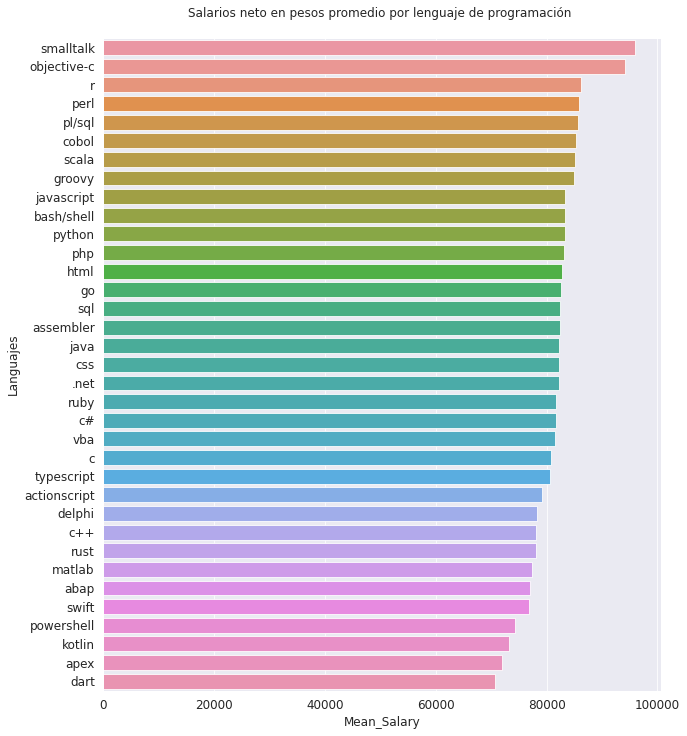

In [38]:
# Lenguajes vs. salarios medios
# Una persona puede trabajar con más de un lenguaje
salary_mean_by_lang = {}
for lang in lang_columns:
  mean_salary = df[df[lang]==1]['salary_monthly_NETO'].mean()
  freq = len(df[df[lang]==1])
  salary_mean_by_lang.update({lang: [mean_salary, freq]})
df5 = pd.DataFrame(list(salary_mean_by_lang.items()), columns=['Languajes','Mean_Salary_and_Freq'])
df5[['Mean_Salary','Freq']] = pd.DataFrame(df5.Mean_Salary_and_Freq.tolist(), index= df5.index)
df5.drop('Mean_Salary_and_Freq', axis=1, inplace=True)
df5 = df5.sort_values(by=['Mean_Salary'], ascending=False, ignore_index=True)
# Plot de Salarios neto promedio por lenguaje de programación
plt.figure(figsize=(10, 12))
seaborn.barplot(x="Mean_Salary", y="Languajes", data=df5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Salarios neto en pesos promedio por lenguaje de programación \n')

**Observaciones:**

- El rango de salarios pasó subió a 0-80000 pesos, mientras que en el caso en que también se contabilizaban los casos no full-time el rango iba de 0-80000 pesos. Ésto es esperable, ya que como vimos en la sección de análisis de trabajos Full-Time vs No Full-Time, la mediana de los sueldos no full-time es menor a los full-time.

- Volviendo a la pregunta inicial del ejercicio 1: "¿Cuáles son los lenguajes de programación asociados a los mejores salarios?", podemos ver que el orden de los lenguajes mejores pagos tuvo una leve variación ('r' y 'pl-sql' subieron a los primeros 5 lugares y 'rust' y 'escala' salieron del top five.

**ACLARACIÓN: Para los siguientes análisis no se utilizará el dataframe convertido a One Hot encoding, si no que se trabajará con la función propuesta por las profes.**

#### Separación de lenguajes de programación

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

In [39]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]
  #return [lang.strip()
  #        for lang in languages_str.split(',')]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,tools_work_pc_os,work_contract_type,tools_frameworks,profile_years_experience,salary_satisfaction,company_main_activity,salary_in_usd,work_role,work_years_in_company,profile_gender,profile_age,cured_programming_languages
0,ninguno,Ninguno,43000.00,53000.00,GNU/Linux,Full-Time,Ninguno,3.00,1.00,Servicios / Consultoría de Software / Digital,NaN,Consultant,3.00,Mujer,26.00,[ninguno]
1,html,"HTML, Javascript, Python",63000.00,79000.00,GNU/Linux,Full-Time,"Django, jQuery",5.00,2.00,Otras industrias,NaN,Developer,2.00,Hombre,29.00,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.00,79000.00,GNU/Linux,Full-Time,"Django, jQuery",5.00,2.00,Otras industrias,NaN,Developer,2.00,Hombre,29.00,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.00,79000.00,GNU/Linux,Full-Time,"Django, jQuery",5.00,2.00,Otras industrias,NaN,Developer,2.00,Hombre,29.00,"[html, javascript, python]"
2,ninguno,Ninguno,127000.00,160000.00,Windows,Full-Time,Ninguno,2.00,3.00,Otras industrias,NaN,Infosec,0.00,Mujer,22.00,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [40]:
len(df)

4438

In [41]:
len(df_lang.programming_language)

12909

In [42]:
df_lang.programming_language.nunique() # cantidad de lenguajes diferentes que quedaron

171

In [43]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
# language_count[language_count['frequency'] > 1]
language_count[:10]

,language,frequency
0,javascript,1734
1,sql,1617
2,html,1314
3,java,1105
4,python,1057
5,css,874
6,bash/shell,735
7,php,631
8,.net,601
9,c#,535


In [44]:
language_count.tail(100)

,language,frequency
71,xml,2
72,gosu,2
73,tal,1
74,yacc,1
75,nativescrip,1
...,...,...
166,asp,1
167,script,1
168,infobasic,1
169,bi,1


En el split anterior, al separarse los lenguajes por espacio, crea una lista con datos erróneos, propios de datos ingresados por un usuario. Vemos que no afecta significativamente en el conteo.

### Listado de lenguajes más populares

In [45]:
# % de lenguajes que quedan fuera por tener freq. <=10
len(language_count[language_count['frequency'] <= 10])/len(language_count)*100

80.11695906432749

In [46]:
# Ver cuántos registros (respuestas de lenguaje por persona) estamos perdiendo al eliminar éstos lenguajes pocos frecuentes.
len(df_lang[df_lang["programming_language"].isin(language_count[language_count["frequency"] <= 10]["language"])])

234

In [47]:
# Lenguajes con freq >10
len(language_count[language_count['frequency'] > 10])

34

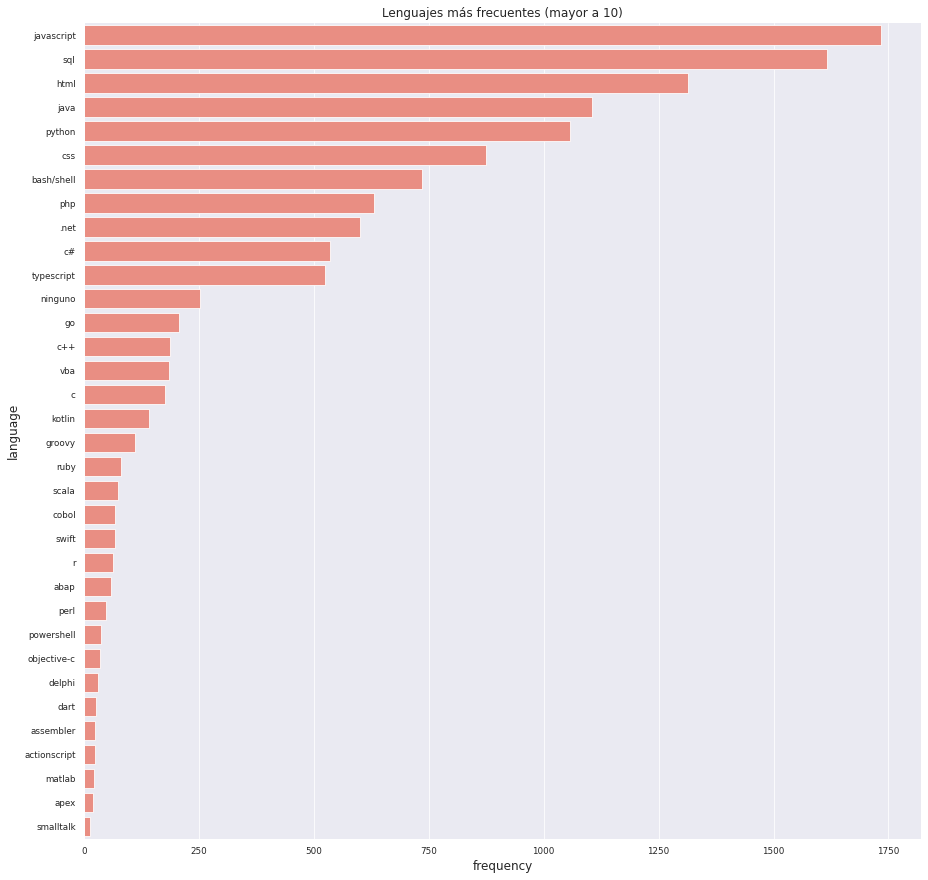

In [48]:
# Plot de fecuencia de lenguajes
fig = plt.figure(figsize=(15, 15))
g = seaborn.barplot(data=language_count[language_count['frequency'] > 10], x='frequency', y='language', color='salmon')
# Log scale
# g.set_xscale("log")
plt.title("Lenguajes más frecuentes (mayor a 10)")
seaborn.despine()

#### One hot encoding de la variable `tools_programming_languages`

Podemos expandir nuestras posibilidades usando una tabla en la que asignemos valores binarios a las características categóricas.
Por ejemplo, para el caso de los lenguajes, podemos usar una columna por cada lenguaje (o los N más frecuentes) y asignarle a cada persona un valor binario para cada columna. Entonces alguien que utiliza sólo Python va a tener un verdadero en esa columna (1) y un falso en Java (0), SQL (0), etc. De esta manera iremos construyendo una matriz.

In [49]:
# Casos donde la variable 'tools_programming_languages' tiene valores nulos
display(len(df[df['tools_programming_languages'].isnull()])) # es un único caso, reemplazaremos el valor null por 'Ninguno'
df.tools_programming_languages.replace(numpy.NaN, 'Ninguno', inplace=True)
display(len(df[df['tools_programming_languages'].isnull()]))
# Luego de eliminar los part time no tenemos valores nulos.

0

0

In [50]:
 # Convertimos cada lenguaje en una columna con 0 o 1. 
 display(len(df))
 df_one_hot = df['tools_programming_languages'].str.replace(' ', '').str.lower().str.get_dummies(sep=',')
 df_one_hot.head()
 # Quedaron unos 144 lenguajes.

4438

,-,.,.net,.netnoesunlenguaje!,4gl,abap,acl,actionscript,ansible,ansible|powershell,apex,apex/salesforce,appeonpowerbuilder,asp,assembler,bash,bash/shell,basic,biztalk,blueprism,c,c#,c++,cg/hlsl,clarion,clipper,clojure,cloudformation,cobol,coldfusion,css,dart,dax,dellboomi,delphi,deluge,elixir,erlang,esql,essbase/hyperion/powerbi/oac/oracledb,...,robin,rpa,ruby,rust,sas,sass,scala,scss,siebel,smalltalk,soap,solidity,soql,sql,swift,tal,terraform,tibco,twig,typescript,unity,vb5,vb6,vb6.0,vba,vbnetvb6,vbscript,vfp,vhdl,visual6,visualbasic,visualbasic6,visualfoxpro,windev,x++,xamarin,xml,xslt,yacc,yaml
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# Nos quedamos con las columnas cuya frecuencia sea mayor a 10
for column in df_one_hot.columns:
    if (df_one_hot[column].sum() <= 10):
        df_one_hot.drop(column, inplace=True, axis=1)
        df_one_hot.reset_index(drop=True, inplace=True)
# Eliminamos las columnas 'ninguno' y 'ningunodelosanteriores'
df_one_hot.drop(columns=['ninguno','ningunodelosanteriores'], axis=1, inplace=True)
df_one_hot.reset_index(drop=True, inplace=True)
print(len(df_one_hot.columns))
print(df_one_hot.columns)
df_one_hot.head()
# Tenemos ahora 33 valores de "lenguales de programación", los que tenían frecuencia mayor a 10.

33
Index(['.net', 'abap', 'actionscript', 'apex', 'assembler', 'bash/shell', 'c',
       'c#', 'c++', 'cobol', 'css', 'dart', 'delphi', 'go', 'groovy', 'html',
       'java', 'javascript', 'kotlin', 'matlab', 'objective-c', 'perl', 'php',
       'powershell', 'python', 'r', 'ruby', 'scala', 'smalltalk', 'sql',
       'swift', 'typescript', 'vba'],
      dtype='object')


,.net,abap,actionscript,apex,assembler,bash/shell,c,c#,c++,cobol,css,dart,delphi,go,groovy,html,java,javascript,kotlin,matlab,objective-c,perl,php,powershell,python,r,ruby,scala,smalltalk,sql,swift,typescript,vba
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [52]:
# Concatenamos ambos dataframes para agregar las columnas de cada lenguaje
df = pd.concat([df, df_one_hot], axis=1) #48+33=81 columnas
display(df.shape)
df.head()

(4438, 118)

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,...,scala,smalltalk,sql,swift,typescript,vba,cured_programming_languages,.net,abap,actionscript,apex,assembler,bash/shell,c,c#,c++,cobol,css,dart,delphi,go,groovy,html,java,javascript,kotlin,matlab,objective-c,perl,php,powershell,python,r,ruby,scala,smalltalk,sql,swift,typescript,vba
0,Mujer,26.00,Argentina,Ciudad Autónoma de Buenos Aires,3.00,3.00,3.00,0.00,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.00,Bruto,Full-Time,53000.00,43000.00,NaN,1.00,1.00,No,No recibo bono,No,0.00,0.00,En mi trabajo actual,Homosexual,...,0.00,0.00,0.00,0.00,0.00,0.00,[ninguno],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hombre,29.00,Argentina,Corrientes,5.00,2.00,2.00,4.00,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.00,Bruto,Full-Time,79000.00,63000.00,NaN,2.00,2.00,Menos de un sueldo,Performance de la compañía,Uno,10.00,1.00,Jamás,Heterosexual,...,0.00,0.00,0.00,0.00,0.00,0.00,"[html, javascript, python]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Mujer,22.00,Argentina,Ciudad Autónoma de Buenos Aires,2.00,0.00,0.00,0.00,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.00,Porcentaje de mi sueldo,Full-Time,160000.00,127000.00,NaN,3.00,3.00,Un sueldo,Performance individual,No,0.00,0.00,En un trabajo anterior,Bisexual o queer,...,0.00,0.00,0.00,0.00,0.00,0.00,[ninguno],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hombre,39.00,Argentina,Corrientes,15.00,15.00,13.00,5.00,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.00,Bruto,Full-Time,130000.00,102000.00,NaN,3.00,1.00,No,No recibo bono,No,0.00,0.00,En mi trabajo actual,Heterosexual,...,0.00,0.00,1.00,0.00,0.00,0.00,"[bash/shell, c, css, html, java, javascript, p...",0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,Hombre,32.00,Argentina,Ciudad Autónoma de Buenos Aires,9.00,6.00,6.00,0.00,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.00,Porcentaje de mi sueldo,Full-Time,140000.00,10

### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

[REVISAR] Porque ya estamos eligiendo los language_count[language_count['frequency'] > 10]

#### Análisis 1: Lenguajes relacionados por área de desarrollo (work_role)
Se plantea el análisis de lenguajes de programación agrupados por área de desarrollo, ya que consideramos que el salario no se asocia únicamente a un lenguaje, sino que se requiere un conjunto de ellos.

Para esto nos replanteamos la pregunta a:

> ¿Qué conjunto de lenguajes/áreas de desarrollo están asociados a los mejores salarios?
i.e: Una vez que tenemos los roles mejores pagos (que cobran por encima de la media), ver cuáles son los lenguajes de esos roles.

>  Vemos que los puestos de mayor jerarquía tienen mayor salario, aunque tienen una menor frequencia. Tal vez convenga analizarlos por separado.


Si orientamos la investigacion a que sea vista por aspirantes a programacion, es conveniente catalogar distintos roles segun el tipo de trabajo, para que se tenga una mejor idea de la variedad de puestos y posicionar el valor de cada uno segun el sueldo.

## Como nos interesa clasificar los roles?

En primer lugar, analizamos la columna 'work_role' que contiene la orientacion o el tipo de trabajo para cada caso. 

Similar al caso de los lenguajes, hay una variedad grande de respuestas dentro de los roles disponibles. 

In [53]:
# Casos distintos para 'work_role'
len(df['work_role'].value_counts())

263

Para simplificar, y tomar solo los datos significativos, tomamos el subgrupo de roles que se repiten mas de 10 veces, similar al proceso hecho en los lenguajes. 

Existen muchas areas donde un programador puede trabajar. En esta encuesta la mayor cantidad de casos esta concentrada en roles de IT. En estos graficos separamos las distintas percepciones de salarios para grupos de roles bajo un mismo perfil. 


--------DISCUTIR UN POCO ESTOS PERFILES--------
- Perfil de Desarrollo:
    - Developer
    - SysAdmin / DevOps / SRE
    - QA / Tester
    - Consultant
    - Networking (revisar)
    - Designer
- Perfil de Liderazgo
    - Manager / Director
    - Architect
    - Project Manager
    - Technical leader
    - Scrum Master
- Perfil de Analisis de negocio
    - BI Analyst / Data Analyst
    - Data Scientist / Data Engineer
- Perfil de soporte
    - DBA
    - HelpDesk

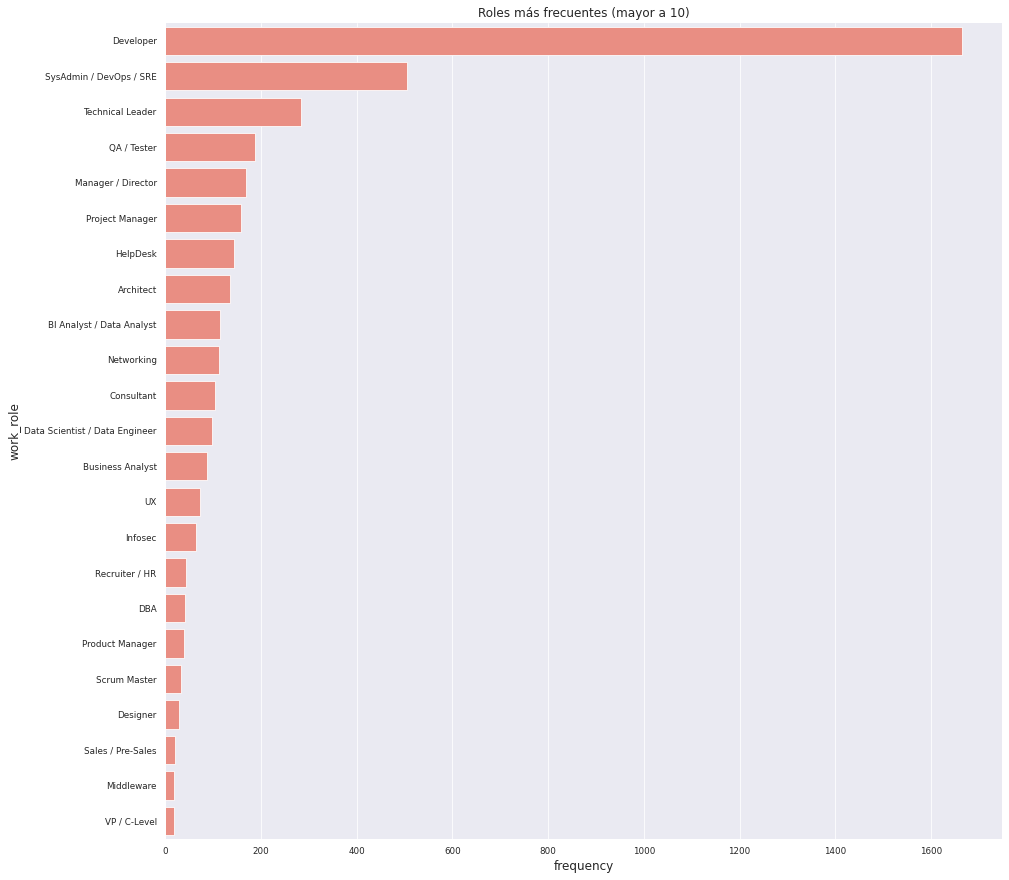

In [54]:
# Plot de frecuencia de roles
df_roles_count=df['work_role'].value_counts().reset_index().rename(columns={'index':'work_role', 'work_role':'frequency'})
fig = plt.figure(figsize=(15, 15))
g = seaborn.barplot(data=df_roles_count[df_roles_count['frequency'] > 10], x='frequency', y='work_role', color='salmon')
# Log scale
# g.set_xscale("log")
plt.title("Roles más frecuentes (mayor a 10)")
seaborn.despine()

In [55]:
# Renombro todos los business analyst a BI Analyst / Data Analyst porque son lo mismo
df.loc[df['work_role'] == "Business Analyst", 'work_role'] = "BI Analyst / Data Analyst"

roles={
    "roles_dev" : [
         "Developer",
         "SysAdmin / DevOps / SRE",
         "QA / Tester",
         "Consultant",
         "Networking",
         "Designer"
    ],
    "roles_lead" : [
        "Manager / Director",
        "Architect",
        "Project Manager",
        "Technical leader",
        "Scrum Master"
    ],
    "roles_bi" : [
        "BI Analyst / Data Analyst",
        "Data Scientist / Data Engineer"
    ],
    "roles_supp" : [
        "DBA",
        "HelpDesk"
    ]
}

for index, row in df_lang.iterrows():
    if row['work_role'] in roles['roles_dev']:
        df_lang.at[index,'role_cat'] =  "Desarrollo"
    elif row['work_role'] in roles['roles_lead']:
        df_lang.at[index,'role_cat'] =   "Liderazgo"
    elif row['work_role'] in roles['roles_bi']:
        df_lang.at[index,'role_cat'] =   "BI / Data Science"
    elif row['work_role'] in roles['roles_supp']:
        df_lang.at[index,'role_cat'] =   "Soporte"
    else: row['role_cat'] = "none"

Si visualizamos las diferencias en distribuciones de salarios para cada lenguaje teniendo en cuenta las 4 categorias de roles usadas, podemos empezar a ver si existen diferencias entre los lenguajes para cada rol. Si, por ejemplo, se gana distinto siendo senior en python que junior en swift. 

In [56]:
popular_languages = language_count[language_count['frequency'] > 10].language
df_lang_pop = df_lang[df_lang['programming_language'].isin(popular_languages)]


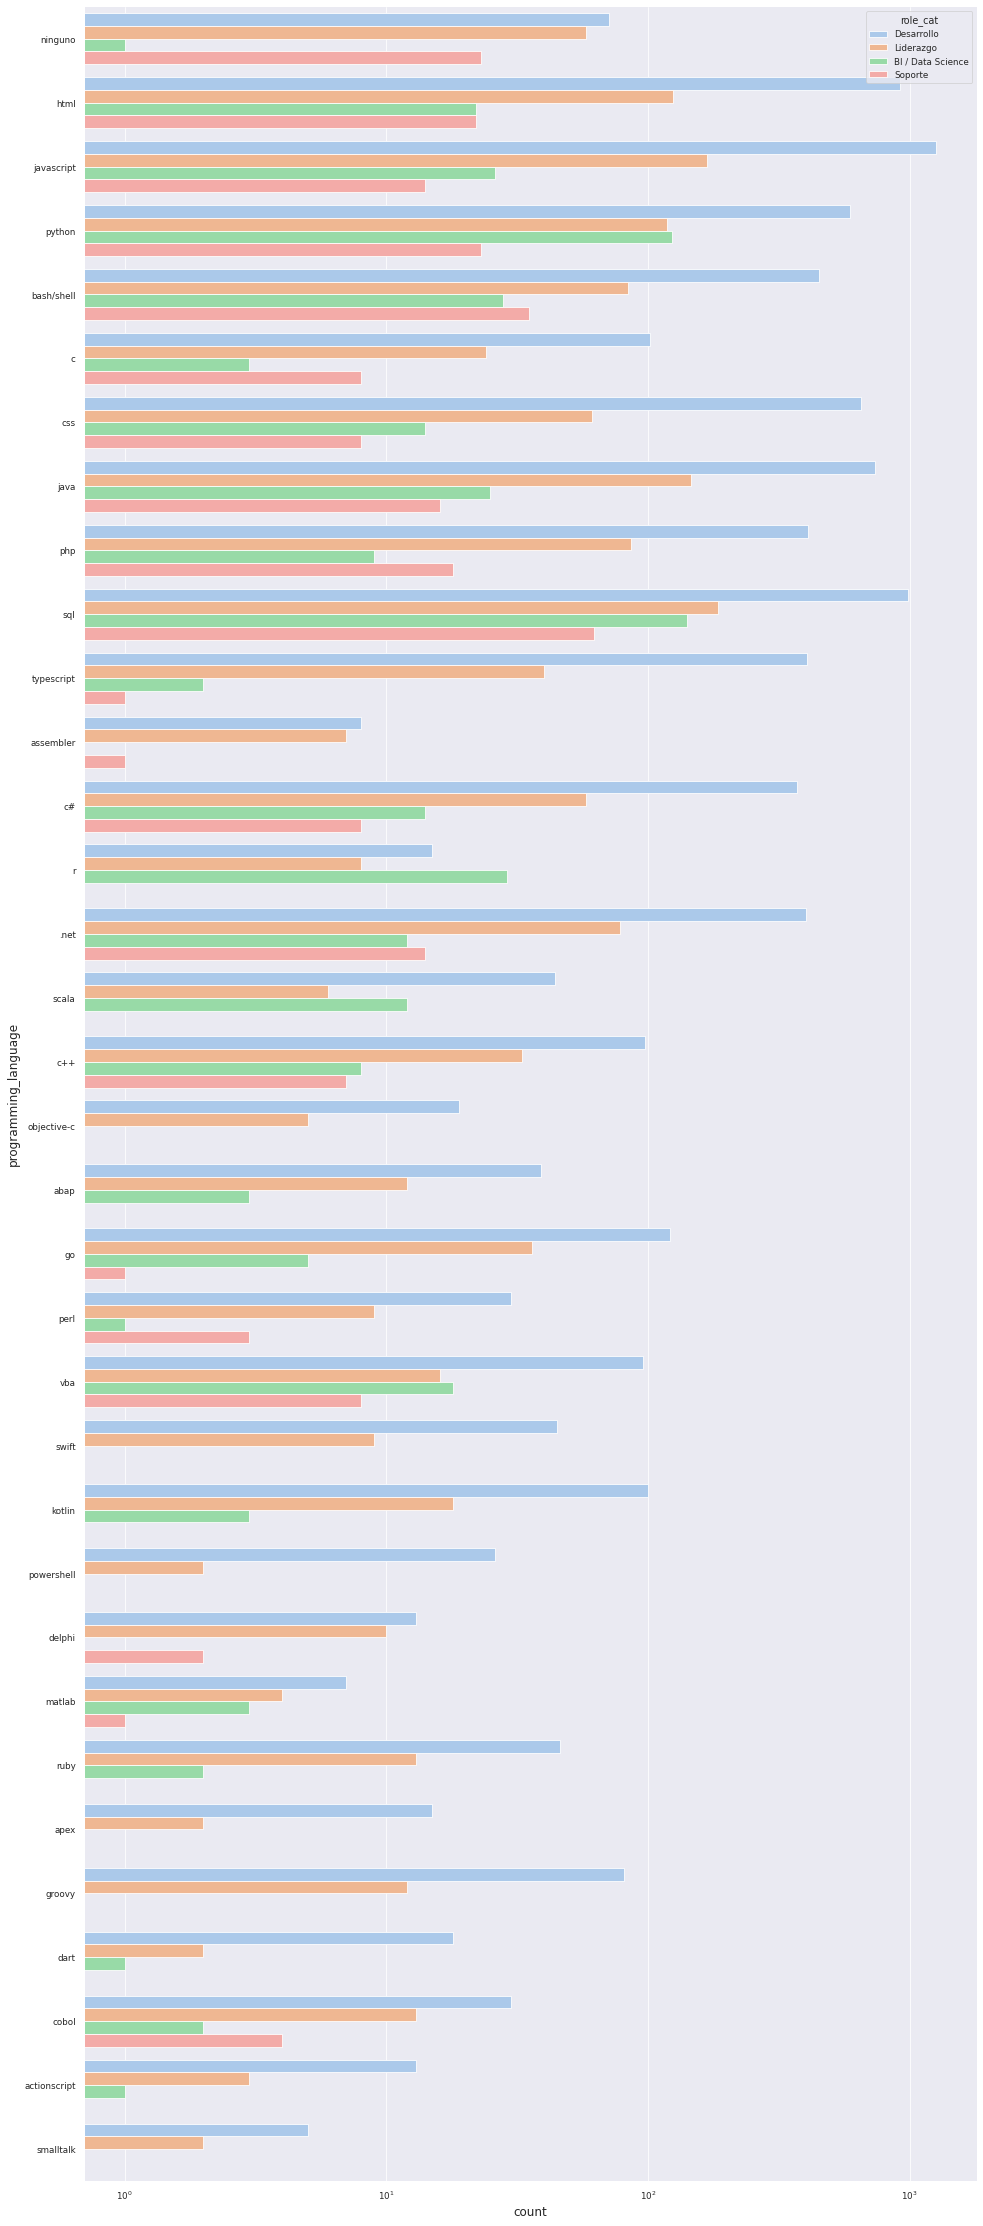

In [57]:
fig, axes = plt.subplots(nrows=1, figsize=(16, 40))
g = seaborn.countplot(
    data=df_lang_pop[df_lang_pop['role_cat'] != 'no'], 
    hue='role_cat',
    y="programming_language"
)
plt.ticklabel_format(style='plain', axis='x')
g.set_xscale('log')
seaborn.despine()

#### Análisis 2: Lenguajes desarrollados para Apple

**Hipótesis:** Aquellas personas que utilizan lenguajes de programación desarrollados específicamente para plataformas Apple, tienen mayor probabilidad de tener mayores salarios.

Para este caso también replanteamos la pregunta:
> ¿Qué conjunto de lenguajes están asociados a los mejores salarios?

In [58]:
# Removemos aquellos que tengan una frecuencia < 10
interesting_languages = language_count[language_count['frequency'] > 10]['language']
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,tools_work_pc_os,work_contract_type,tools_frameworks,profile_years_experience,salary_satisfaction,company_main_activity,salary_in_usd,work_role,work_years_in_company,profile_gender,profile_age,cured_programming_languages,role_cat
0,ninguno,Ninguno,43000.00,53000.00,GNU/Linux,Full-Time,Ninguno,3.00,1.00,Servicios / Consultoría de Software / Digital,NaN,Consultant,3.00,Mujer,26.00,[ninguno],Desarrollo
1,html,"HTML, Javascript, Python",63000.00,79000.00,GNU/Linux,Full-Time,"Django, jQuery",5.00,2.00,Otras industrias,NaN,Developer,2.00,Hombre,29.00,"[html, javascript, python]",Desarrollo
1,javascript,"HTML, Javascript, Python",63000.00,79000.00,GNU/Linux,Full-Time,"Django, jQuery",5.00,2.00,Otras industrias,NaN,Developer,2.00,Hombre,29.00,"[html, javascript, python]",Desarrollo
1,python,"HTML, Javascript, Python",63000.00,79000.00,GNU/Linux,Full-Time,"Django, jQuery",5.00,2.00,Otras industrias,NaN,Developer,2.00,Hombre,29.00,"[html, javascript, python]",Desarrollo
2,ninguno,Ninguno,127000.00,160000.00,Windows,Full-Time,Ninguno,2.00,3.00,Otras industrias,NaN,Infosec,0.00,Mujer,22.00,[ninguno],NaN


In [59]:
# Cantidad de lenguajes a analizar
len(filtered_df_lang['programming_language'].unique())

34

In [60]:
filtered_df_lang['programming_language'].unique()

array(['ninguno', 'html', 'javascript', 'python', 'bash/shell', 'c',
       'css', 'java', 'php', 'sql', 'typescript', 'assembler', 'c#', 'r',
       '.net', 'scala', 'c++', 'objective-c', 'abap', 'go', 'perl', 'vba',
       'swift', 'kotlin', 'powershell', 'delphi', 'matlab', 'ruby',
       'apex', 'groovy', 'dart', 'cobol', 'actionscript', 'smalltalk'],
      dtype=object)

In [61]:
# Con conocimiento de dominio asociamos los lenguajes de programación
# con el entorno para el cual se desarrolla. Aquellos sin asociación 
# corresponden a multiplataforma.
is_lang_for_apple = {
  'html': 'no Apple', 
  'javascript': 'no Apple', 
  'python': 'no Apple', 
  'bash/shell': 'no Apple', 
  'c': 'no Apple',
  'css': 'no Apple', 
  'java': 'no Apple', 
  'php': 'no Apple', 
  'sql': 'no Apple', 
  'typescript': 'no Apple', 
  'assembler': 'no Apple', 
  'c#': 'no Apple', 
  'r': 'no Apple',
  '.net': 'no Apple', 
  'delphi': 'no Apple', 
  'vba': 'no Apple', 
  'scala': 'no Apple', 
  'c++': 'no Apple', 
  'objective-c': 'Apple', 
  'abap': 'no Apple',
  'go': 'no Apple', 
  'perl': 'no Apple', 
  'ruby': 'no Apple', 
  'elixir': 'no Apple', 
  'groovy': 'no Apple', 
  'swift': 'Apple', 
  'kotlin': 'no Apple',
  'powershell': 'no Apple', 
  'matlab': 'no Apple', 
  'apex': 'no Apple', 
  'no': 'no Apple', 
  'genexus': 'no Apple', 
  'pl/sql': 'no Apple', 
  'dart': 'no Apple',
  'rust': 'no Apple', 
  'cobol': 'no Apple', 
  'actionscript': 'no Apple', 
  'smalltalk': 'no Apple'
}
plat_df = pd.DataFrame.from_dict(is_lang_for_apple, orient='index').reset_index()
plat_df.columns = ['programming_language', 'is_lang_for_apple']

In [62]:
df_by_platform = pd.merge(filtered_df_lang, plat_df, on=['programming_language'])
df_by_platform[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,tools_work_pc_os,work_contract_type,tools_frameworks,profile_years_experience,salary_satisfaction,company_main_activity,salary_in_usd,work_role,work_years_in_company,profile_gender,profile_age,cured_programming_languages,role_cat,is_lang_for_apple
0,html,"HTML, Javascript, Python",63000.00,79000.00,GNU/Linux,Full-Time,"Django, jQuery",5.00,2.00,Otras industrias,NaN,Developer,2.00,Hombre,29.00,"[html, javascript, python]",Desarrollo,no Apple
1,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.00,130000.00,GNU/Linux,Full-Time,"jQuery, WordPress",15.00,3.00,Otras industrias,NaN,SysAdmin / DevOps / SRE,15.00,Hombre,39.00,"[bash/shell, c, css, html, java, javascript, p...",Desarrollo,no Apple
2,html,"CSS, HTML, Javascript, SQL, TypeScript",106000.00,140000.00,macOS,Full-Time,"Angular, Node.js",9.00,1.00,Servicios / Consultoría de Software / Digital,NaN,Developer,6.00,Hombre,32.00,"[css, html, javascript, sql, typescript]",Desarrollo,no Apple
3,html,"CSS, HTML, Javascript, PHP, SQL",63000.00,70000.00,Windows,Full-Time,"Angular, Bootstrap, Flutter, jQuery, Laravel, ...",10.00,2.00,Otras industrias,NaN,Developer,1.00,Hombre,34.00,"[css, html, javascript, php, sql]",Desarrollo,no Apple
4,html,"HTML, Javascript, PHP, SQL",92000.00,102000.00,Windows,Full-Time,WordPress,20.00,3.00,Producto basado en Software,NaN,Manager / Director,21.00,Hombre,45.00,"[html, javascript, php, sql]",Liderazgo,no Apple


In [63]:
df_by_platform['is_lang_for_apple'].value_counts()

no Apple    12322
Apple         101
Name: is_lang_for_apple, dtype: int64

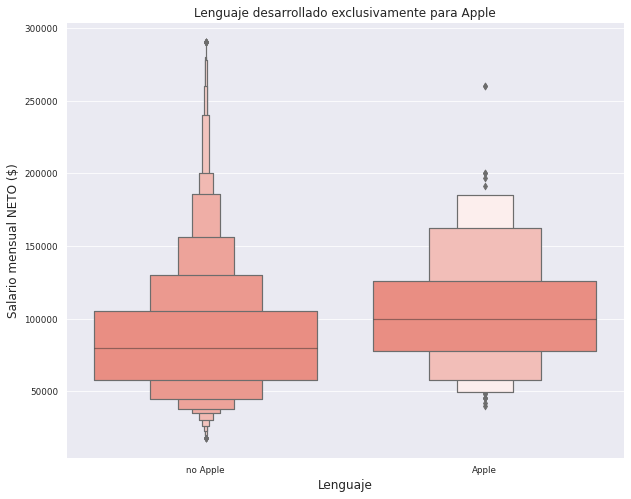

In [64]:
fig = plt.figure(figsize=(10, 8))
g = seaborn.boxenplot(
    data=df_by_platform, 
    x='is_lang_for_apple', 
    y='salary_monthly_NETO',
    color='salmon'
)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Lenguaje")
plt.ylabel("Salario mensual NETO ($)")
plt.title("Lenguaje desarrollado exclusivamente para Apple")
seaborn.despine()

##### Conclusión
Podemos ver que:
- La mediana de salarios de aquellas personas que programan en lenguajes específicos para Apple es mayor a la mediana del resto de aquellos que programan en el resto de los lenguajes.

Entonces, respondiendo a la pregunta:  

> Los lenguajes asociados a los mejores salarios son los desarrollados para Apple, es decir: **Swift y Objective-c**.

#### Análisis 3: Lenguajes relacionados al desarrollo web



In [65]:
interesting_languages = ["python", "javascript", "sql", "html","java", "css", "bash/shell", "php", ".net", "typescript", "c#"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filter_of_null_values= (filtered_df_lang.salary_monthly_NETO.isnull() == False)
filter_quantile= (filtered_df_lang.salary_monthly_NETO > filtered_df_lang.salary_monthly_NETO.quantile(0.04)) & (filtered_df_lang.salary_monthly_NETO < filtered_df_lang.salary_monthly_NETO.quantile(0.96))
df_filtered = filtered_df_lang[ (filter_of_null_values) & (filter_quantile) ]

len(filtered_df_lang), len(df_filtered)

(10727, 9803)

In [66]:
filtered_df_lang['salary_monthly_NETO'].describe().round()

count    10727.00
mean     85695.00
std      39979.00
min      18000.00
25%      57000.00
50%      80000.00
75%     105000.00
max     290000.00
Name: salary_monthly_NETO, dtype: float64

In [67]:
df_filtered['salary_monthly_NETO'].describe().round()

count     9803.00
mean     82632.00
std      29934.00
min      36200.00
25%      59000.00
50%      80000.00
75%     101000.00
max     168300.00
Name: salary_monthly_NETO, dtype: float64

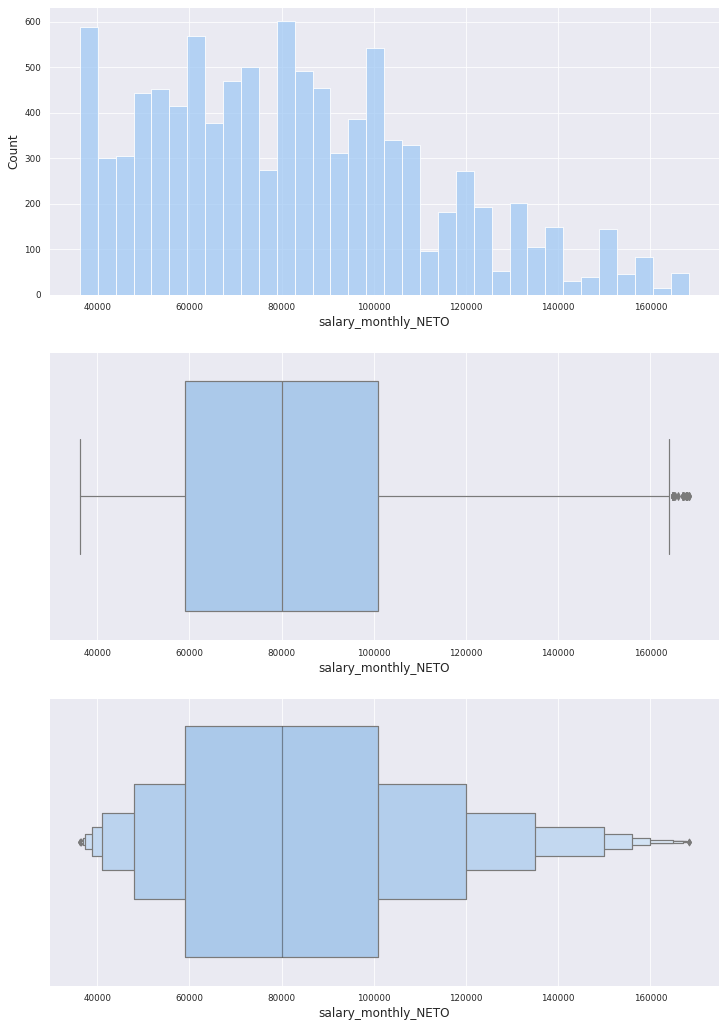

In [68]:
fig, axes = plt.subplots(figsize=(12, 18), nrows=3)
seaborn.histplot(x=df_filtered['salary_monthly_NETO'], ax=axes[0])
seaborn.boxplot(x=df_filtered['salary_monthly_NETO'], ax=axes[1])
seaborn.boxenplot(x=df_filtered['salary_monthly_NETO'], ax=axes[2])

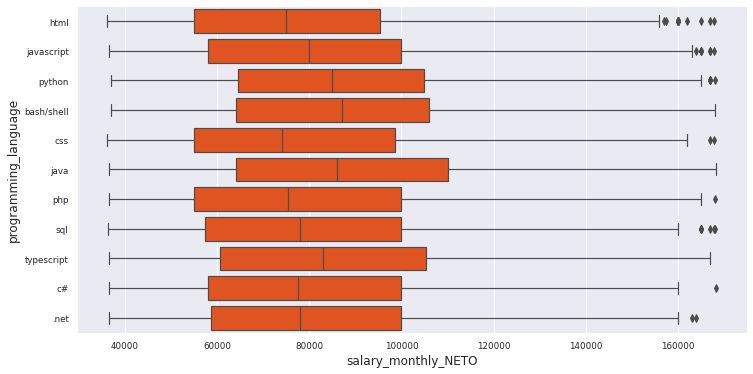

In [69]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_filtered, x='salary_monthly_NETO', y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

Por conocimiento de campo, html y css suelen estar juntos - es muy raro tocar solo html o solo css, y la distribucion de ambas es muy parecida.

In [70]:
html_css_filter_list=["html", "css", "HTML", "CSS", "Html", "Css"]
cured_test=["html", "javascript", "python", "php"]
# funcion que, dado un array original y un array de filtrado, devuelve el array nuevo, 
# eliminando los elementos que estan incluidos en el array de filtrado
#para cured_programming_languages --> array

def cured_lang_html_css( array_lang, list_filters):
  if any (x in array_lang for x in list_filters):
    filtered_array = [x for x in array_lang if x not in list_filters]
    filtered_array.append("html/css")
    array_lang=filtered_array
  return array_lang

cured_lang_html_css(cured_test, html_css_filter_list)

['javascript', 'python', 'php', 'html/css']

In [71]:
# funcion que, dado un string y un array, devuelve el string filtrado, 
# eliminando los elementos que estan incluidos en el array

# para tools_programming_languages --> string
def filtered_lang_html_or_css(string_of_lang, list_filters):
  if any (x in string_of_lang for x in list_filters):
    array_of_lang_from_string = [x.strip() for x in string_of_lang.split(",")]
    filtered_array_from_array_of_lang = [x for x in array_of_lang_from_string if x not in list_filters]
    string_of_lang=' '.join(filtered_array_from_array_of_lang)+" HTML/CSS"

  return string_of_lang

# test filtered_lang_html_or_css(example_lang_test, html_css_filter_list)

In [72]:
#filtramos valores nullos and so on
df_filter_of_null_values= (df.salary_monthly_NETO.isnull() == False)
df_filter_quantile= (df.salary_monthly_NETO > df.salary_monthly_NETO.quantile(0.04)) & (df.salary_monthly_NETO < df.salary_monthly_NETO.quantile(0.96))
df= df[ (df_filter_of_null_values) & (df_filter_quantile) ]

TODO: Completar con lo de Nati

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

Lo que hemos hecho a lo largo de los diferentes ejercicios y entregables, como una primera manera de familiarizarse con el dataset e ir teniendo algo de información al respecto, es utilizar el método `.describe()`

Este método nos da varios valores impotantes por columna: 

*   `count`: cantidad de datos
*   `mean` : media de la columna
*   `std`: varianza de la columna
*   `min` y `max` : valores  mínimos y máximos
*   valores de percentiles del `25%`, `50%` y `75%`


In [77]:
df_seg=pd.read_csv(url)

In [78]:
df_seg.describe(include= "all")

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
count,6095,6095.00,6095,6095,6095.00,6095.00,6095.00,6095.00,6095,6095,5796,5561,6095,6095,6095,6095,6093,6094,6094,6093,6089,6094,6095,6095,6095,6095.00,6095,6095,6095.00,5883.00,676,6095.00,6095.00,6095,6095,6095,6095.00,6095.00,5954,5912,600,2207,6095,6095,6095.00,6095.00,6094,1692
unique,3,nan,1,25,nan,nan,nan,nan,7,3,495,799,7,2,2,334,1183,1637,1371,1271,717,1097,4,4,3,nan,3,5,nan,nan,1,nan,nan,5,192,5,nan,nan,3,42,89,2,10,3,nan,nan,1916,1293
top,Hombre,nan,Argentina,Ciudad Autónoma de Buenos Aires,nan,nan,nan,nan,Universitario,Completado,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",No,Sí,Developer,Ninguna de las anteriores,Ninguno de los anteriores,Ninguno de los anteriores,Ninguna de las anteriores,Ninguna de las anteriores,Ninguno de los anteriores,Windows,Android,No,nan,Porcentaje de mi sueldo,Full-Time,nan,nan,Mi sueldo está dolarizado,nan,nan,No,No recibo bono,No,nan,nan,Jamás,Heterosexual,Visual,No,11-50,Producto basado en Software,nan,nan,Ninguna de las anteriores,Mercado Libre
freq,5122,nan,6095,3764,nan,nan,nan,nan,4133,2907,1194,1378,2650,5211,3268,2402,744,661,1379,871,2173,903,3442,4868,4640,nan,3183,5166,nan,nan,676,nan,nan,3782,3673,2671,nan,nan,4096,4905,319,2064,1065,2200,nan,nan,828,72
mean,NaN,41.18,NaN,NaN,8.93,3.31,2.89,2.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,664.04,NaN,NaN,124058.55,94907.95,NaN,2.62,2.36,NaN,NaN,NaN,10.44,2.79,NaN,NaN,NaN,NaN,NaN,NaN,7.34,7.62,NaN,NaN
std,NaN,665.72,NaN,NaN,7.16,4.37,3.42,32.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10540.52,NaN,NaN,122912.35,96862.26,NaN,0.86,0.95,NaN,NaN,NaN,12.86,2.84,NaN,NaN,NaN,NaN,NaN,NaN,2.02,2.32,NaN,NaN
min,NaN,18.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,1.00,1.00,NaN,1.00,1.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN,NaN
25%,NaN,27.00,NaN,NaN,3.00,0.00,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,61595.00,51480.00,NaN,2.00,2.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.00,NaN,NaN
50%,NaN,31.00,NaN,NaN,7.00,2.00,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,96000.00,78000.00,NaN,3.00,2.00,NaN,NaN,NaN,7.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,8.00,8.00,NaN,NaN
75%,NaN,37.00,NaN,NaN,13.00,4.00,4.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,145000.00,106000.00,NaN,3.00,3.00,NaN,NaN,NaN,18.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,9.00,10.00,NaN,NaN


Aqui ya vemos ciertas cosas de primera en la columna profile_age. La media es 45,6 años, pero la varianza 665.72 años? Esto es extraño, hasta ahora no conocemos de una persona humana de 800 años. Si vemos el valor máximo, es de 52mil años, seguro vio a Jesús, la construcción de las pirámides y la creación de la rueda. Esta columna debera ser analizada por valores erróneos.

Tambien tenemos ya un acercamiento para empezar a interpretar el tipo de variable: si es numérica o categórica (aunque hay excepciones, por ejemplo la satisfación con tu salario `salary_satisfaction`, son números, pero corresponden a una escala de más a menos satisfacción.


Para encontrar asociaciones y relaciones debemos acercarnos más al dataset y hacernos preguntas. Para seguir con el ejercicio nos preguntamos, ***existe relacion entre el salario y el genero de la persona encuestada?***

Las columnas que relevantes para responder serán: `profile_gender` y `salary_monthly_NETO`

Procedemos a analizar las filas relevantes, prestando atencion en valores mínimos, máximos o erróneos. Para esto, vamos a graficar las variables para ver su distribución; `profile_gender` es categórica, por lo que podemos usar la moda y un histograma para `salary_monthly_NETO`, que es una variable numérica.

In [79]:
df_seg[['profile_gender','salary_monthly_NETO']].describe(include= "all")

,profile_gender,salary_monthly_NETO
count,6095,5883.00
unique,3,nan
top,Hombre,nan
freq,5122,nan
mean,NaN,94907.95
std,NaN,96862.26
min,NaN,1.00
25%,NaN,51480.00
50%,NaN,78000.00
75%,NaN,106000.00


Lo que nos ayuda mucho es tener herramientas visuales para ver el comportamiento de cada una de estas variables. 

Para esto, identificamos el tipo de variable de cada una: `salary_monthly_NETO` es una variable numérica y `profile_gender` es categórica. 

Se realizo el analisis de outliers en el punto anterior del entregable

Para analizar la relación entre una variable categórica y una variable numérica utilizamos un grafico boxplot

In [85]:
df_inliers[['profile_gender', 'salary_monthly_NETO']].describe(include= "all")

,profile_gender,salary_monthly_NETO
count,5700,5700.00
unique,3,nan
top,Hombre,nan
freq,4770,nan
mean,NaN,81995.65
std,NaN,46605.21
min,NaN,1.00
25%,NaN,50000.00
50%,NaN,75000.00
75%,NaN,102000.00


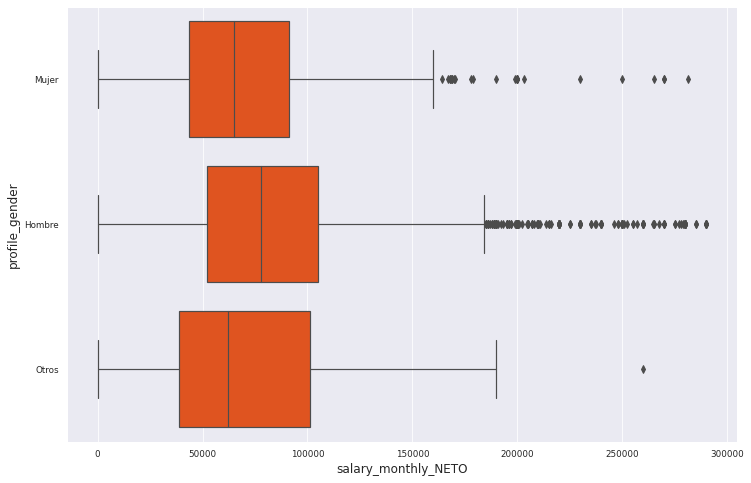

In [87]:
fig, axes = plt.subplots(figsize=(12, 8))

seaborn.boxplot(data=df_inliers, x='salary_monthly_NETO', y='profile_gender',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

Si me centro en la diferencia entre las subpoblaciones que se autoperciben con genero hombre y genero mujer, vemos que el box donde empieza el percentil 50% en el caso de los hombres, empieza con un sueldo superior a las mujeres, y vemos que su mediana esta más a la derecha - es decir tiene salarios mas alto en promedio.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa





Variables numéricas

*   `profile_age`
*   `profile_years_experience`
*   `salary_monthly_NETO`

Variables categóricas

*   `profile_university`
*   `company_main_activity`



Con una variable categorica y una numerica podemos estudiar su distribucion usando un boxplot



In [119]:
interested_universities=df_inliers['profile_university'].value_counts()[:10].index.tolist()

In [124]:
uni_filter= df_inliers.profile_university.isin(interested_universities)


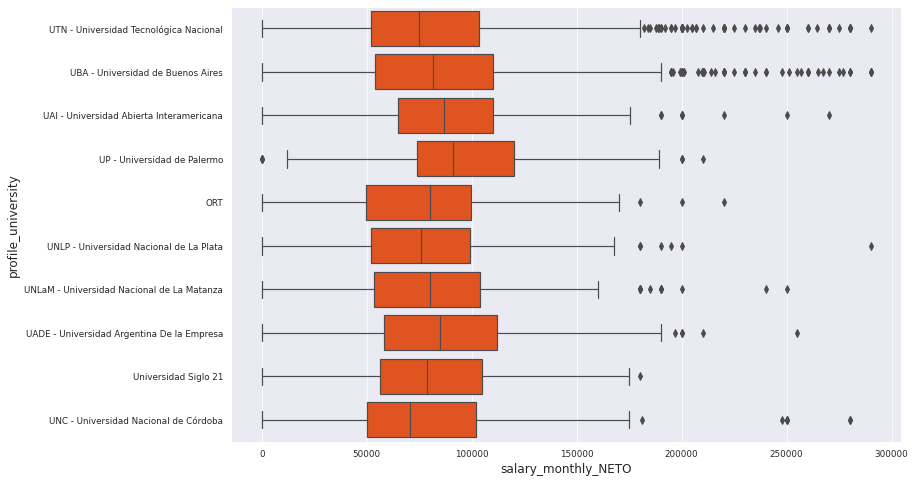

In [126]:
fig, axes = plt.subplots(figsize=(12, 8))

seaborn.boxplot(data=df_inliers[uni_filter], x='salary_monthly_NETO', y='profile_university',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

La UNC tiene la mediana mas chica, en promedio ganamos menos que otras universidades :(

Si son dos numéricas, experiencia y salario, un scatterplot

In [132]:
#df_inliers[df_inliers['profile_years_experience']<40]

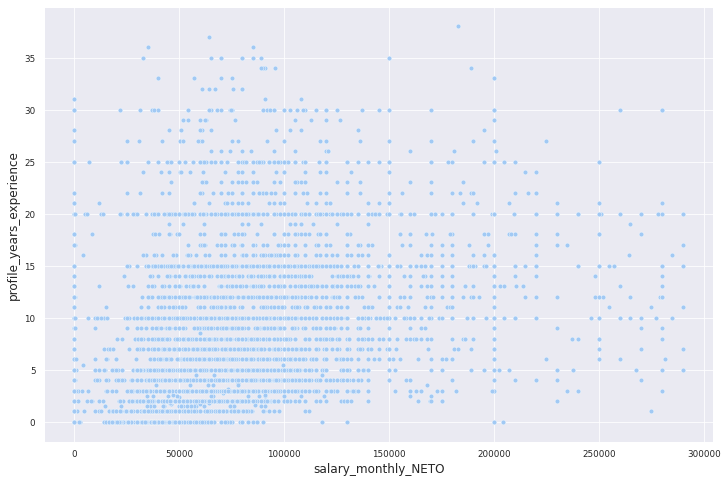

In [133]:
fig, axes = plt.subplots(figsize=(12, 8))

seaborn.scatterplot(data=df_inliers[df_inliers['profile_years_experience']<40], x='salary_monthly_NETO', y='profile_years_experience')

A medida que aumentan los años de experiencia, la concentracion de puntos se mueve hacia la derecha

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
